In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

df = pd.read_csv(r'/kaggle/input/predictive-crime-analysis/FIR_Details_Data.csv')



2024-03-21 09:14:52.863445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 09:14:52.863606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 09:14:53.058334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_18/2233284079.py:10: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/kaggle/input/predictive-crime-analysis/FIR_Details_Data.csv')


In [2]:
!pip install tensorflow


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
df


District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2016      1   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

               Offence_From_Date          Offence_To_Date  \
0        2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1        2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2        2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3        2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
4        2016-01-18 15:00:00.000  2016-01-18 15:05:00.000   
...                          ...                      ...   
1694186  2024-01-10 05:30:00.000  2024-01-10 21:30:00.000   
1694187  2024-01-19 22:30:00.000  2024-01-19 22:35:00.000   
1694188  2024-02-06 15:42:00.000  2024-02-06 15:45:00.000   
1694189  2024-02-19 12:10:00.000  2024-02-19 12:15:00.000   
1694190  2024-02-26 22:30:00.000  2024-02-26 22:45:00.000   

                FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0        2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1        2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2        2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3        2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
4        2016-01-18 19:30:00.000  18/01/2016  ...            0             1   
...                          ...         ...  ...          ...           ...   
1694186  2024-01-11 21:30:00.000  11/01/2024  ...            0             0   
1694187  2024-01-29 19:30:00.000  29/01/2024  ...            0             1   
1694188  2024-02-07 17:45:00.000  07/02/2024  ...            0             1   
1694189  2024-02-24 17:00:00.000  24/02/2024  ...            0             5   
1694190  2024-02-28 18:30:00.000  28/02/2024  ...            0             1   

        Arrested Male Arrested Female Arrested Count\tNo.  \
0                   1               0                   1   
1                   5               0                   5   
2                   1               0                   1   
3                   1               0                   1   
4                   1               0                   1   
...               ...             ...                 ...   
1694186             0               0                   0   
1694187             0               0                   0   
1694188             0               0                   0   
1694189             0               0                   0   
1694190             0               0                   0   

         Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                  1                 0  2016000002    1245   
1                                  5                 2  2016000003    1245   
2                                  1                 0  2016000004    1245   
3                                  1                 0  2016000005    1245   
4                                  1                 0  2016000006    1245   
...                              ...               ...         ...     ...   
1694186                            0                 0  2024000002    2183   
1694187                            0                 0  2024000003    2183   
1694188                   

In [4]:
df.columns


Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No'],
      dtype='object')

In [5]:
df[['CrimeHead_Name']]

CrimeHead_Name
0                               Others
1                 Street Gambling (87)
2        Gambling - Matka (78 Class C)
3                    National Highways
4                          Other Roads
...                                ...
1694186                          Women
1694187                           Rape
1694188                   Other Places
1694189              Dowry Prohibition
1694190                         Others

[1694191 rows x 1 columns]

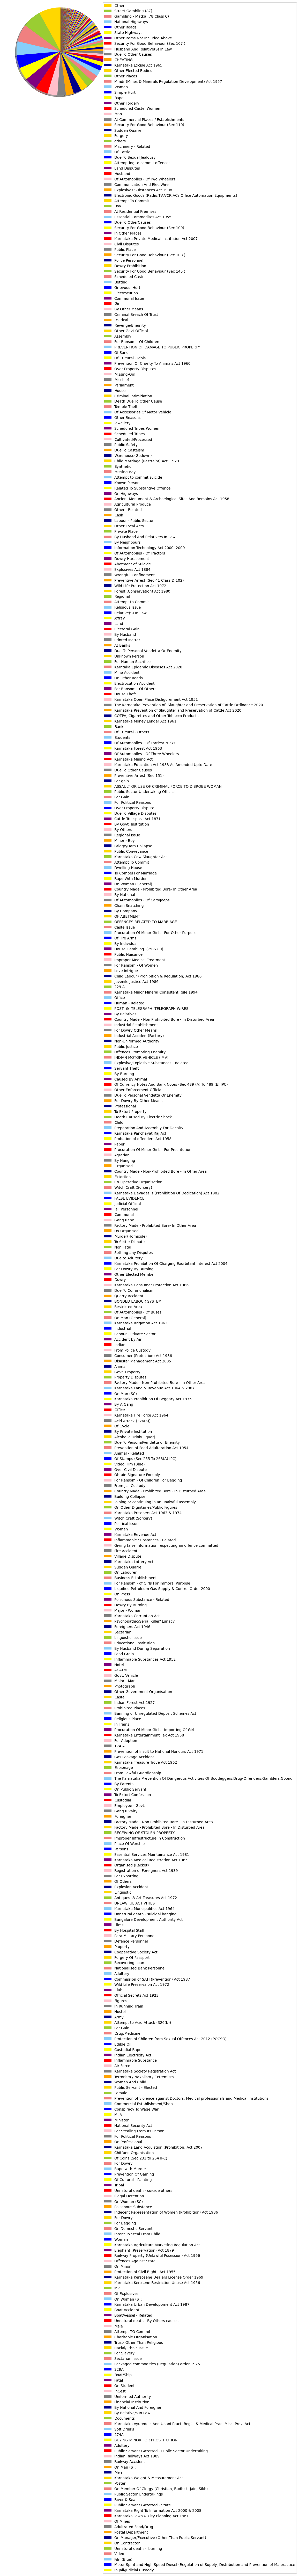

In [6]:
# Data to plot
labels = df["CrimeHead_Name"].unique()
sizes = df['CrimeHead_Name'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','yellow','purple', 'red','pink','grey','orange','darkblue']


patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,   bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.75)
plt.axis('equal')
plt.show()

In [7]:
df[df['FIR Type'] == 'Non Heinous']

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2016      1   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
5            Bagalkot        Amengad PS  0006/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694183        Yadgir  Yadgiri Women PS  0043/2023   1  2023     11   
1694184        Yadgir  Yadgiri Women PS  0044/2023   1  2023     12   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

               Offence_From_Date          Offence_To_Date  \
0        2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1        2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2        2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3        2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
5        2016-01-19 08:00:00.000  2016-01-19 08:05:00.000   
...                          ...                      ...   
1694183  2023-11-16 08:30:00.000  2023-11-16 16:30:00.000   
1694184  2023-12-03 05:00:00.000  2023-12-03 05:10:00.000   
1694186  2024-01-10 05:30:00.000  2024-01-10 21:30:00.000   
1694188  2024-02-06 15:42:00.000  2024-02-06 15:45:00.000   
1694190  2024-02-26 22:30:00.000  2024-02-26 22:45:00.000   

                FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0        2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1        2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2        2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3        2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
5        2016-01-19 15:30:00.000  19/01/2016  ...            0             1   
...                          ...         ...  ...          ...           ...   
1694183  2023-11-20 19:30:00.000  20/11/2023  ...            0             1   
1694184  2023-12-04 12:30:00.000  04/12/2023  ...            0             0   
1694186  2024-01-11 21:30:00.000  11/01/2024  ...            0             0   
1694188  2024-02-07 17:45:00.000  07/02/2024  ...            0             1   
1694190  2024-02-28 18:30:00.000  28/02/2024  ...            0             1   

        Arrested Male Arrested Female Arrested Count\tNo.  \
0                   1               0                   1   
1                   5               0                   5   
2                   1               0                   1   
3                   1               0                   1   
5                   1               0                   1   
...               ...             ...                 ...   
1694183             0               0                   0   
1694184             0               0                   0   
1694186             0               0                   0   
1694188             0               0                   0   
1694190             0               0                   0   

         Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                  1                 0  2016000002    1245   
1                                  5                 2  2016000003    1245   
2                                  1                 0  2016000004    1245   
3                                  1                 0  2016000005    1245   
5                                  1                 0  2016000007    1245   
...                              ...               ...         ...     ...   
1694183                            0                 0  2023000043    2183   
1694184                            0                 0  2023000044    2183   
1694186                   

In [8]:
brut_crime = df[df['FIR Type'] == 'Heinous']

In [9]:
df.describe()


RI          Year         Month      Latitude     Longitude  \
count  1694191.0  1.694191e+06  1.694191e+06  1.694186e+06  1.694186e+06   
mean         1.0  2.019498e+03  6.265559e+00  4.777780e+00  2.256945e+01   
std          0.0  2.469614e+00  3.450797e+00  9.312399e+00  3.484787e+01   
min          1.0  2.016000e+03  1.000000e+00 -7.709293e-01  0.000000e+00   
25%          1.0  2.017000e+03  3.000000e+00  0.000000e+00  0.000000e+00   
50%          1.0  2.019000e+03  6.000000e+00  0.000000e+00  0.000000e+00   
75%          1.0  2.022000e+03  9.000000e+00  1.290353e+01  7.501574e+01   
max          1.0  2.024000e+03  1.200000e+01  1.314300e+02  7.777447e+02   

        Internal_IO          Male        Female           Boy          Girl  \
count  1.694191e+06  1.694191e+06  1.694191e+06  1.694191e+06  1.694191e+06   
mean   1.051404e+08  5.297101e-01  2.314975e-01  2.650587e-02  4.013597e-02   
std    7.697634e+07  7.869578e-01  5.762274e-01  2.036732e-01  2.336817e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.890003e+07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.077015e+08  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.457000e+08  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.943000e+09  9.400000e+01  7.300000e+01  4.500000e+01  4.800000e+01   

       ...  VICTIM COUNT  Accused Count  Arrested Male  Arrested Female  \
count  ...  1.694191e+06   1.694191e+06   1.694191e+06     1.694191e+06   
mean   ...  2.768283e-04   1.781500e+00   8.219380e-01     7.806676e-02   
std    ...  2.583600e-02   2.750907e+00   1.749466e+00     4.361517e-01   
min    ...  0.000000e+00   0.000000e+00   0.000000e+00     0.000000e+00   
25%    ...  0.000000e+00   1.000000e+00   0.000000e+00     0.000000e+00   
50%    ...  0.000000e+00   1.000000e+00   0.000000e+00     0.000000e+00   
75%    ...  0.000000e+00   2.000000e+00   1.000000e+00     0.000000e+00   
max    ...  1.600000e+01   2.890000e+02   2.020000e+02     6.300000e+01   

       Arrested Count\tNo.  Accused_ChargeSheeted Count  Conviction Count  \
count         1.694191e+06                 1.694191e+06      1.694191e+06   
mean          9.005466e-01                 1.542069e+00      3.451736e-01   
std           1.896494e+00                 2.567539e+00      1.154536e+00   
min           0.000000e+00                 0.000000e+00      0.000000e+00   
25%           0.000000e+00                 0.000000e+00      0.000000e+00   
50%           0.000000e+00                 1.000000e+00      0.000000e+00   
75%           1.000000e+00                 2.000000e+00      0.000000e+00   
max           2.070000e+02                 3.300000e+02      7.400000e+01   

             FIR_ID       Unit_ID      Crime_No  
count  1.694191e+06  1.694191e+06  1.694191e+06  
mean   2.019499e+09  1.196936e+03  1.053624e+16  
std    2.469606e+06  6.152223e+02  8.497911e+14  
min    2.016000e+09  6.000000e+00  1.043801e+16  
25%    2.017000e+09  7.520000e+02  1.044318e+16  
50%    2.019000e+09  1.336000e+03  1.044919e+16  
75%    2.022000e+09  1.642000e+03  1.046321e+16  
max    2.024000e+09  2.348000e+03  1.044322e+17  

[8 rows x 21 columns]

In [10]:
# Import preprocessing from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
df1 = df.copy()

In [12]:
df1.dtypes

District_Name                   object
UnitName                        object
FIRNo                           object
RI                               int64
Year                             int64
Month                            int64
Offence_From_Date               object
Offence_To_Date                 object
FIR_Reg_DateTime                object
FIR_Date                        object
FIR Type                        object
FIR_Stage                       object
Complaint_Mode                  object
CrimeGroup_Name                 object
CrimeHead_Name                  object
Latitude                       float64
Longitude                      float64
ActSection                      object
IOName                          object
KGID                            object
IOAssigned_Date                 object
Internal_IO                      int64
Place of Offence                object
Distance from PS                object
Beat_Name                       object
Village_Area_Name        

In [13]:
data = df1.select_dtypes(include=[object])

data.head()

District_Name    UnitName      FIRNo        Offence_From_Date  \
0      Bagalkot  Amengad PS  0001/2016  2015-12-27 12:00:00.000   
1      Bagalkot  Amengad PS  0002/2016  2016-01-12 17:30:00.000   
2      Bagalkot  Amengad PS  0003/2016  2016-01-12 17:45:00.000   
3      Bagalkot  Amengad PS  0004/2016  2016-01-14 21:30:00.000   
4      Bagalkot  Amengad PS  0005/2016  2016-01-18 15:00:00.000   

           Offence_To_Date         FIR_Reg_DateTime    FIR_Date     FIR Type  \
0  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000  05/01/2016  Non Heinous   
1  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000  12/01/2016  Non Heinous   
2  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000  12/01/2016  Non Heinous   
3  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000  15/01/2016  Non Heinous   
4  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000  18/01/2016      Heinous   

       FIR_Stage      Complaint_Mode                    CrimeGroup_Name  \
0        Dis/Acq             Written                              POCSO   
1      Convicted  Sue-moto by Police          KARNATAKA POLICE ACT 1963   
2      Convicted  Sue-moto by Police          KARNATAKA POLICE ACT 1963   
3      Convicted             Written  MOTOR VEHICLE ACCIDENTS NON-FATAL   
4  Pending Trial             Written      MOTOR VEHICLE ACCIDENTS FATAL   

                  CrimeHead_Name  \
0                         Others   
1           Street Gambling (87)   
2  Gambling - Matka (78 Class C)   
3              National Highways   
4                    Other Roads   

                                          ActSection                   IOName  \
0  PROTECTION OF CHILDREN FROM SEXUAL OFFENCES AC...       R S BIRADAR   (PI)   
1                KARNATAKA POLICE ACT, 1963 U/s: 87         G.H.KUPPI   (PSI)   
2             KARNATAKA POLICE ACT, 1963 U/s: 78(3)        S G HELVAR   (ASI)   
3                         IPC 1860 U/s: 338,337,279        R S BIRADAR   (PI)   
4                          IPC 1860 U/s: 304(A),279   Karuneshagowda J   (PI)   

      KGID IOAssigned_Date                                   Place of Offence  \
0  1898733             NaN             KAMATAGI BUS STAND, KAMATAGI BUS STAND   
1  1332599             NaN  RAKKASAGI VILLEGE IN FRONT MOUNESHWAR TEMPEL, ...   
2  1270757             NaN  RAKKASAGI VILLAEG BUS STAND, RAKKASAGI VILLAEG...   
3  1898733             NaN  BAGALKOT TO AMINAGAD SH-20 ROAD NEAR CHAPI FIE...   
4  1820048             NaN         AMBLIKOPPA BUS STAND, AMBLIKOPPA BUS STAND   

              Distance from PS         Beat_Name Village_Area_Name  
0           WEST FROM PS 12 KM  RURAL BEAT NO 13          KAMATAGI  
1            WEST FROM PS 2 KM   RURAL BEAT NO 6          SULEBAVI  
2            EAST FROM PS 3 KM   RURAL BEAT NO 6          SULEBAVI  
3           WEST FROM PS 14 KM  RURAL BEAT NO 13          KAMATAGI  
4  NORTH FROM 24 KM TOWARDS PS  RURAL BEAT NO 16           MADAPUR

In [14]:
data.shape

(1694191, 20)

In [15]:
data.dtypes 

District_Name        object
UnitName             object
FIRNo                object
Offence_From_Date    object
Offence_To_Date      object
FIR_Reg_DateTime     object
FIR_Date             object
FIR Type             object
FIR_Stage            object
Complaint_Mode       object
CrimeGroup_Name      object
CrimeHead_Name       object
ActSection           object
IOName               object
KGID                 object
IOAssigned_Date      object
Place of Offence     object
Distance from PS     object
Beat_Name            object
Village_Area_Name    object
dtype: object

In [16]:
# Create a LabelEncoder object and fit it to each feature in data

# encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()

In [17]:
# Create a LabelEncoder object and fit it to each feature in data

# encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()

In [18]:
#Fit and Transform 
# use df.apply() to apply le.fit_transform to all columns

temp_df = data.astype(str).apply(le.fit_transform)
temp_df.head()

District_Name  UnitName  FIRNo  Offence_From_Date  Offence_To_Date  \
0              0        26      0              19614             9263   
1              0        26      9              21598            12320   
2              0        26     18              21600            12324   
3              0        26     27              21887            12829   
4              0        26     36              22374            13649   

   FIR_Reg_DateTime  FIR_Date  FIR Type  FIR_Stage  Complaint_Mode  \
0               491       396         1          4               8   
1              1338      1088         1          3               7   
2              1341      1088         1          3               7   
3              1652      1382         1          3               8   
4              2025      1676         0          7               8   

   CrimeGroup_Name  CrimeHead_Name  ActSection  IOName   KGID  \
0               86             351      212990   15172  16240   
1               66             437      206909    4649   7085   
2               66             178      206654   17622   6300   
3               73             285      105416   15172  16240   
4               72             350       69053    8522  14301   

   IOAssigned_Date  Place of Offence  Distance from PS  Beat_Name  \
0                9            537660            393062       5532   
1                9           1113786            393084       5544   
2                9           1113770            220715       5544   
3                9            118514            393069       5532   
4                9             44940            239661       5535   

   Village_Area_Name  
0               7795  
1              14346  
2              14346  
3               7795  
4               9932

In [19]:
#correlation matrix
corr = temp_df.corr()
corr.style.background_gradient(cmap='coolwarm')


In [20]:
plt.savefig('result.png')

<Figure size 640x480 with 0 Axes>

In [21]:
strong_corr = temp_df.corr().round(6).unstack()
strong_corr = strong_corr[abs(strong_corr) >= 0.9]
strong_corr = strong_corr.sort_values(ascending=False)
strong_df= strong_corr.to_frame().reset_index()
strong_df

level_0            level_1         0
0       District_Name      District_Name  1.000000
1            UnitName           UnitName  1.000000
2           Beat_Name          Beat_Name  1.000000
3    Distance from PS   Distance from PS  1.000000
4    Place of Offence   Place of Offence  1.000000
5     IOAssigned_Date    IOAssigned_Date  1.000000
6                KGID               KGID  1.000000
7              IOName             IOName  1.000000
8          ActSection         ActSection  1.000000
9      CrimeHead_Name     CrimeHead_Name  1.000000
10    CrimeGroup_Name    CrimeGroup_Name  1.000000
11     Complaint_Mode     Complaint_Mode  1.000000
12          FIR_Stage          FIR_Stage  1.000000
13           FIR Type           FIR Type  1.000000
14           FIR_Date           FIR_Date  1.000000
15   FIR_Reg_DateTime   FIR_Reg_DateTime  1.000000
16    Offence_To_Date    Offence_To_Date  1.000000
17  Offence_From_Date  Offence_From_Date  1.000000
18              FIRNo              FIRNo  1.000000
19  Village_Area_Name  Village_Area_Name  1.000000
20   FIR_Reg_DateTime    Offence_To_Date  0.991247
21    Offence_To_Date   FIR_Reg_DateTime  0.991247
22    Offence_To_Date  Offence_From_Date  0.972425
23  Offence_From_Date    Offence_To_Date  0.972425
24   FIR_Reg_DateTime  Offence_From_Date  0.961674
25  Offence_From_Date   FIR_Reg_DateTime  0.961674

In [22]:
strong_df = strong_df[strong_df.level_0!=strong_df.level_1]
m = pd.DataFrame(np.sort(strong_df[['level_0','level_1']], axis=1), index=strong_df.index).duplicated()
strong_df = strong_df[~m]
strong_df = strong_df.reset_index(drop=True)
strong_df

level_0            level_1         0
0  FIR_Reg_DateTime    Offence_To_Date  0.991247
1   Offence_To_Date  Offence_From_Date  0.972425
2  FIR_Reg_DateTime  Offence_From_Date  0.961674

In [23]:
df

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2016      1   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

               Offence_From_Date          Offence_To_Date  \
0        2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1        2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2        2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3        2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
4        2016-01-18 15:00:00.000  2016-01-18 15:05:00.000   
...                          ...                      ...   
1694186  2024-01-10 05:30:00.000  2024-01-10 21:30:00.000   
1694187  2024-01-19 22:30:00.000  2024-01-19 22:35:00.000   
1694188  2024-02-06 15:42:00.000  2024-02-06 15:45:00.000   
1694189  2024-02-19 12:10:00.000  2024-02-19 12:15:00.000   
1694190  2024-02-26 22:30:00.000  2024-02-26 22:45:00.000   

                FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0        2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1        2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2        2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3        2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
4        2016-01-18 19:30:00.000  18/01/2016  ...            0             1   
...                          ...         ...  ...          ...           ...   
1694186  2024-01-11 21:30:00.000  11/01/2024  ...            0             0   
1694187  2024-01-29 19:30:00.000  29/01/2024  ...            0             1   
1694188  2024-02-07 17:45:00.000  07/02/2024  ...            0             1   
1694189  2024-02-24 17:00:00.000  24/02/2024  ...            0             5   
1694190  2024-02-28 18:30:00.000  28/02/2024  ...            0             1   

        Arrested Male Arrested Female Arrested Count\tNo.  \
0                   1               0                   1   
1                   5               0                   5   
2                   1               0                   1   
3                   1               0                   1   
4                   1               0                   1   
...               ...             ...                 ...   
1694186             0               0                   0   
1694187             0               0                   0   
1694188             0               0                   0   
1694189             0               0                   0   
1694190             0               0                   0   

         Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                  1                 0  2016000002    1245   
1                                  5                 2  2016000003    1245   
2                                  1                 0  2016000004    1245   
3                                  1                 0  2016000005    1245   
4                                  1                 0  2016000006    1245   
...                              ...               ...         ...     ...   
1694186                            0                 0  2024000002    2183   
1694187                            0                 0  2024000003    2183   
1694188                   

In [24]:
df[df['District_Name'] == 'Bagalkot']

District_Name    UnitName      FIRNo  RI  Year  Month  \
0          Bagalkot  Amengad PS  0001/2016   1  2016      1   
1          Bagalkot  Amengad PS  0002/2016   1  2016      1   
2          Bagalkot  Amengad PS  0003/2016   1  2016      1   
3          Bagalkot  Amengad PS  0004/2016   1  2016      1   
4          Bagalkot  Amengad PS  0005/2016   1  2016      1   
...             ...         ...        ...  ..   ...    ...   
28382      Bagalkot  Teradal PS  0029/2024   1  2024      3   
28383      Bagalkot  Teradal PS  0030/2024   1  2024      3   
28384      Bagalkot  Teradal PS  0031/2024   1  2024      3   
28385      Bagalkot  Teradal PS  0032/2024   1  2024      3   
28386      Bagalkot  Teradal PS  0033/2024   1  2024      3   

             Offence_From_Date          Offence_To_Date  \
0      2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1      2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2      2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3      2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
4      2016-01-18 15:00:00.000  2016-01-18 15:05:00.000   
...                        ...                      ...   
28382  2009-03-31 10:30:00.000  2015-11-02 17:00:00.000   
28383  2024-02-29 18:30:00.000  2024-02-29 18:31:00.000   
28384  2024-02-26 17:30:00.000  2024-02-26 17:31:00.000   
28385  2024-03-05 17:30:00.000  2024-03-05 17:31:00.000   
28386  2024-03-06 18:15:00.000  2024-03-06 18:16:00.000   

              FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0      2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1      2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2      2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3      2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
4      2016-01-18 19:30:00.000  18/01/2016  ...            0             1   
...                        ...         ...  ...          ...           ...   
28382  2024-03-03 10:15:00.000  03/03/2024  ...            0             2   
28383  2024-03-03 16:30:00.000  03/03/2024  ...            0             1   
28384  2024-03-04 14:15:00.000  04/03/2024  ...            0             1   
28385  2024-03-05 19:15:00.000  05/03/2024  ...            0             1   
28386  2024-03-06 21:15:00.000  06/03/2024  ...            0             3   

      Arrested Male Arrested Female Arrested Count\tNo.  \
0                 1               0                   1   
1                 5               0                   5   
2                 1               0                   1   
3                 1               0                   1   
4                 1               0                   1   
...             ...             ...                 ...   
28382             0               0                   0   
28383             0               0                   0   
28384             0               0                   0   
28385             0               0                   0   
28386             0               0                   0   

       Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                1                 0  2016000002    1245   
1                                5                 2  2016000003    1245   
2                                1                 0  2016000004    1245   
3                                1                 0  2016000005    1245   
4                                1                 0  2016000006    1245   
...                            ...               ...         ...     ...   
28382                            0                 0  2024000048    1260   
28383                            0                 0  2024000049    1260   
28384                            0                 0  2024000050    1260   
28385                            0                 0  2024000051    1260   
28386                            0                 0  2024

In [25]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No'],
      dtype='object')

In [26]:
x=df.groupby([ 'CrimeGroup_Name',"Year"]).agg({'Accused_ChargeSheeted Count':'sum'}).reset_index()
xlbs = list(df["Year"].unique())

In [27]:
labels

array(['Others', 'Street Gambling (87)', 'Gambling - Matka (78 Class C)',
       'National Highways', 'Other Roads', 'State Highways',
       'Other Items Not Included Above',
       'Security For Good Behaviour (Sec 107 )',
       'Husband And Relative(S) In Law ', 'Due To Other Causes  ',
       'CHEATING', 'Karnataka Excise Act 1965', 'Other Elected Bodies',
       'Other Places',
       'Mmdr (Mines & Minerals Regulation Development) Act 1957', 'Women',
       'Simple Hurt ', 'Rape', 'Other Forgery', 'Scheduled Caste  Women',
       'Man', 'At Commercial Places / Establishments',
       'Security For Good Behaviour (Sec 110)', 'Sudden Quarrel',
       'Forgery ', 'others ', 'Machinery - Related', 'Of Cattle',
       'Due To Sexual Jealousy', 'Attempting to commit offences',
       'Land Disputes', 'Husband', 'Of Automobiles - Of Two Wheelers',
       'Communication And Elec.Wire', 'Explosives Substances Act 1908',
       'Electronic Goods (Radio,TV,VCR,ACs,Office Automation Equipme

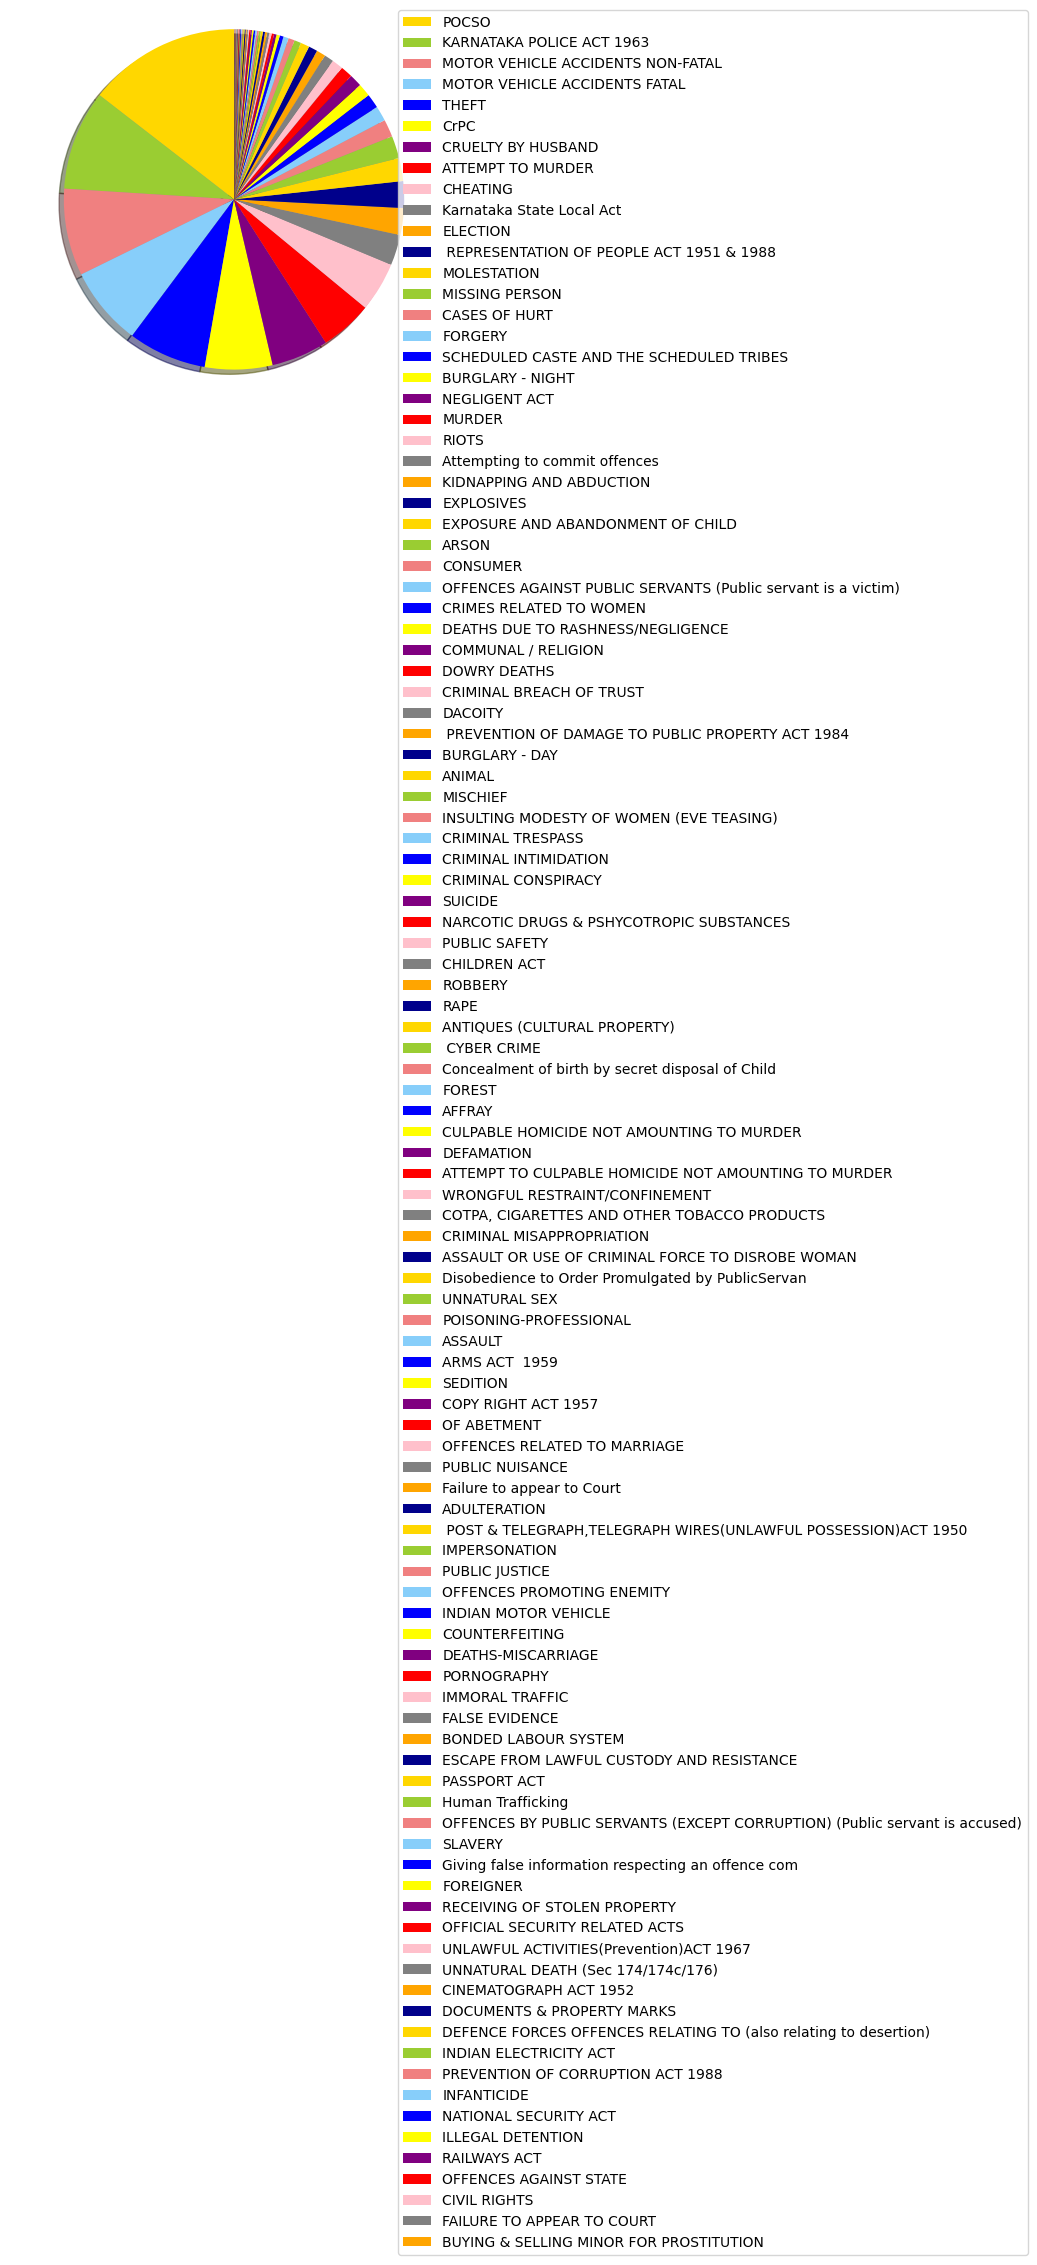

In [28]:
# Data to plot
labels = df['CrimeGroup_Name'].unique()
sizes = df['CrimeGroup_Name'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','yellow','purple', 'red','pink','grey','orange','darkblue']


patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,   bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.75)
plt.axis('equal')
plt.show()

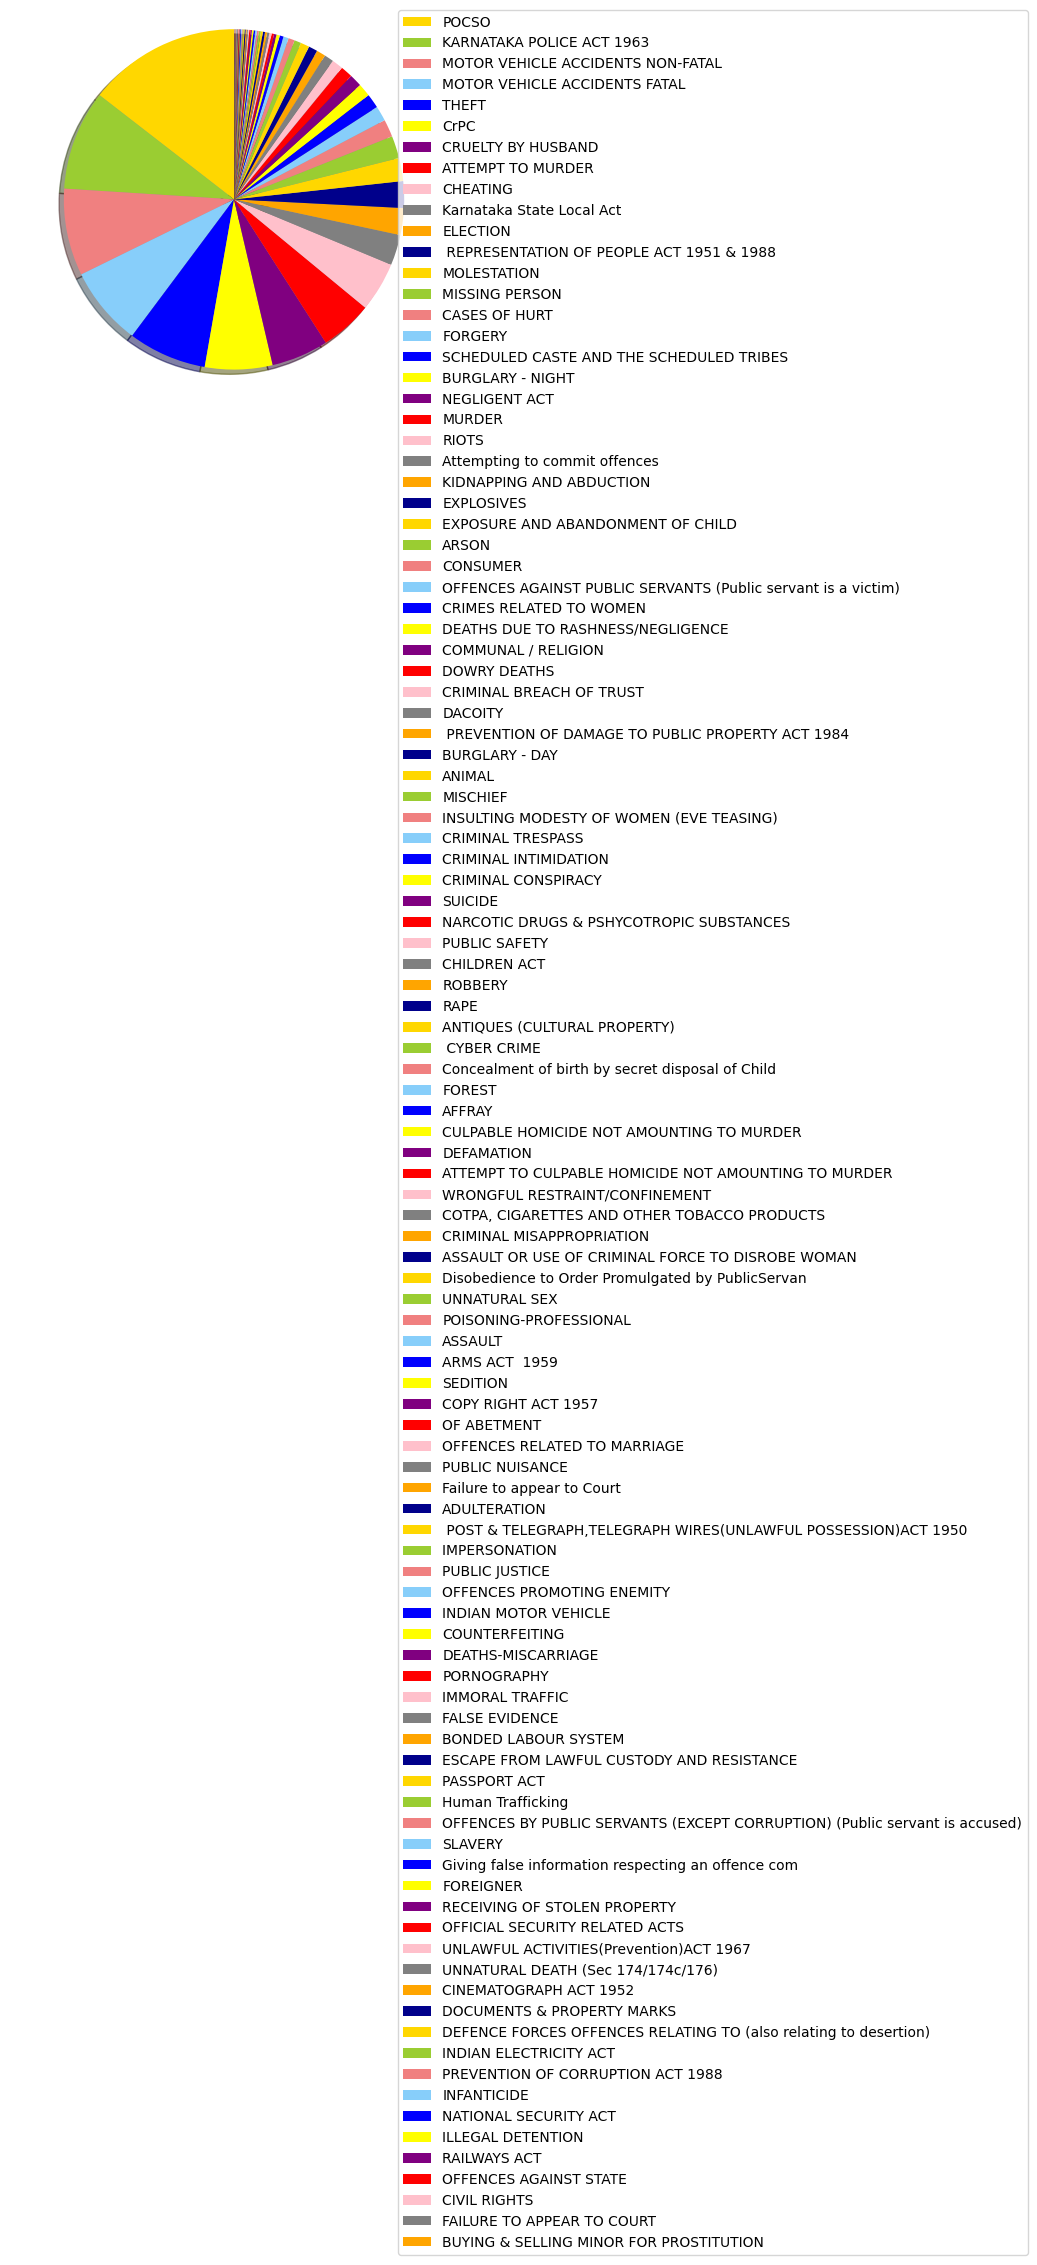

In [29]:
# Data to plot
label = df['CrimeGroup_Name'].unique()
size = df['CrimeGroup_Name'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','yellow','purple', 'red','pink','grey','orange','darkblue']


patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,   bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.75)
plt.axis('equal')
plt.show()

In [30]:
 df['CrimeGroup_Name'].unique()

array(['POCSO', 'KARNATAKA POLICE ACT 1963',
       'MOTOR VEHICLE ACCIDENTS NON-FATAL',
       'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC',
       'CRUELTY BY HUSBAND', 'ATTEMPT TO MURDER', 'CHEATING',
       'Karnataka State Local Act', 'ELECTION',
       ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION',
       'MISSING PERSON', 'CASES OF HURT', 'FORGERY',
       'SCHEDULED CASTE AND THE SCHEDULED TRIBES ', 'BURGLARY - NIGHT',
       'NEGLIGENT ACT', 'MURDER', 'RIOTS',
       'Attempting to commit offences', 'KIDNAPPING AND ABDUCTION',
       'EXPLOSIVES', 'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON',
       'CONSUMER',
       'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',
       'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE',
       'COMMUNAL / RELIGION   ', 'DOWRY DEATHS',
       'CRIMINAL BREACH OF TRUST', 'DACOITY',
       ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984',
       'BURGLARY - DAY', 'ANIMAL', 'MISCHIEF',
       'IN

In [31]:
xgraph=x.loc[x['CrimeGroup_Name'] == "POCSO"]
xgraph=x.loc[x['CrimeGroup_Name'] == "RAPE"]

In [32]:
crimes = df["CrimeGroup_Name"].unique()

In [33]:
df

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2016      1   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

               Offence_From_Date          Offence_To_Date  \
0        2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1        2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2        2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3        2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
4        2016-01-18 15:00:00.000  2016-01-18 15:05:00.000   
...                          ...                      ...   
1694186  2024-01-10 05:30:00.000  2024-01-10 21:30:00.000   
1694187  2024-01-19 22:30:00.000  2024-01-19 22:35:00.000   
1694188  2024-02-06 15:42:00.000  2024-02-06 15:45:00.000   
1694189  2024-02-19 12:10:00.000  2024-02-19 12:15:00.000   
1694190  2024-02-26 22:30:00.000  2024-02-26 22:45:00.000   

                FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0        2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1        2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2        2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3        2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
4        2016-01-18 19:30:00.000  18/01/2016  ...            0             1   
...                          ...         ...  ...          ...           ...   
1694186  2024-01-11 21:30:00.000  11/01/2024  ...            0             0   
1694187  2024-01-29 19:30:00.000  29/01/2024  ...            0             1   
1694188  2024-02-07 17:45:00.000  07/02/2024  ...            0             1   
1694189  2024-02-24 17:00:00.000  24/02/2024  ...            0             5   
1694190  2024-02-28 18:30:00.000  28/02/2024  ...            0             1   

        Arrested Male Arrested Female Arrested Count\tNo.  \
0                   1               0                   1   
1                   5               0                   5   
2                   1               0                   1   
3                   1               0                   1   
4                   1               0                   1   
...               ...             ...                 ...   
1694186             0               0                   0   
1694187             0               0                   0   
1694188             0               0                   0   
1694189             0               0                   0   
1694190             0               0                   0   

         Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                  1                 0  2016000002    1245   
1                                  5                 2  2016000003    1245   
2                                  1                 0  2016000004    1245   
3                                  1                 0  2016000005    1245   
4                                  1                 0  2016000006    1245   
...                              ...               ...         ...     ...   
1694186                            0                 0  2024000002    2183   
1694187                            0                 0  2024000003    2183   
1694188                   

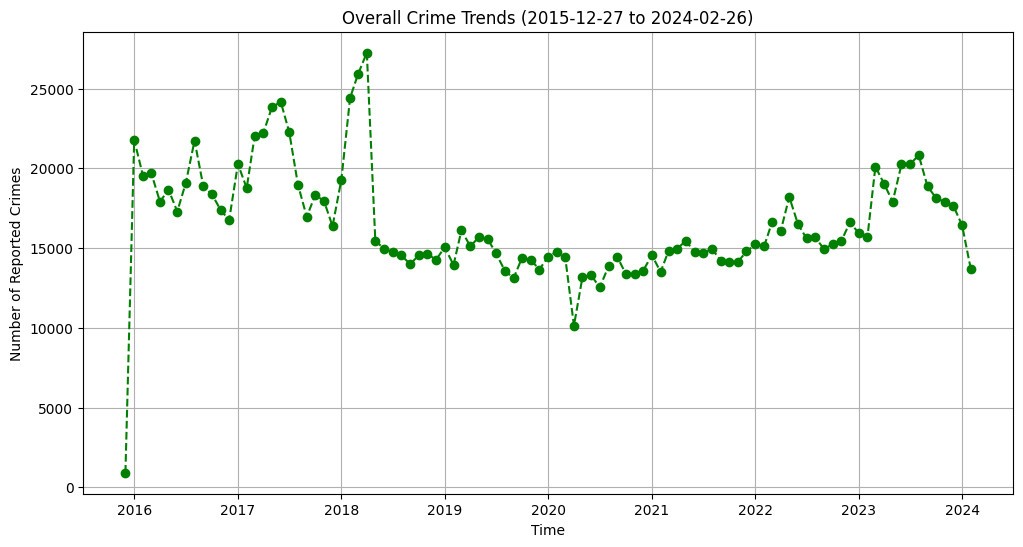

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime("2015-12-27")
end_date = pd.to_datetime("2024-02-26") 

# Convert "Offence_From_Date" column to datetime if it's not already in datetime format
df['Offence_From_Date'] = pd.to_datetime(df['Offence_From_Date'])

# Filter the DataFrame based on the datetime range
filtered_data = df[(df["Offence_From_Date"] >= start_date) & (df["Offence_From_Date"] <= end_date)]

# Group the filtered data by month and count the occurrences
crime_trends = filtered_data.groupby(filtered_data["Offence_From_Date"].dt.to_period('M')).size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(crime_trends.index.to_timestamp(), crime_trends.values, marker='o', linestyle='--', color='green')
plt.title("Overall Crime Trends (2015-12-27 to 2024-02-26)")
plt.xlabel("Time")
plt.ylabel("Number of Reported Crimes")
plt.grid(True)
plt.show()


/tmp/ipykernel_18/1670800832.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_trends = filtered_data.groupby(pd.Grouper(key="Offence_From_Date", freq="M")).size()


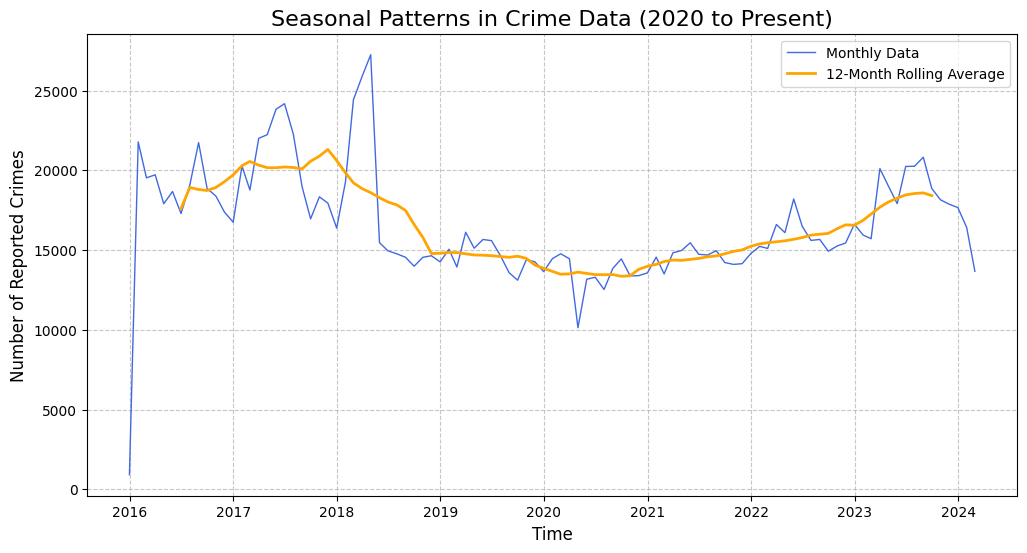

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime("2015-12-27")
end_date = pd.to_datetime("2024-02-26") 

# Convert "Offence_From_Date" column to datetime if it's not already in datetime format
df['Offence_From_Date'] = pd.to_datetime(df['Offence_From_Date'])

# Filter the DataFrame based on the datetime range
filtered_data = df[(df['Offence_From_Date'] >= start_date) & (df['Offence_From_Date'] <= end_date)]

# Group the filtered data by month and count the occurrences
crime_trends = filtered_data.groupby(pd.Grouper(key="Offence_From_Date", freq="M")).size()
rolling_avg = crime_trends.rolling(window=12, center=True).mean()  # Use a 12-month rolling window for yearly patterns

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(crime_trends.index, crime_trends.values, label='Monthly Data', color='royalblue', linewidth=1)
plt.plot(rolling_avg.index, rolling_avg.values, label='12-Month Rolling Average', color='orange', linewidth=2)
plt.title("Seasonal Patterns in Crime Data (2020 to Present)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of Reported Crimes", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




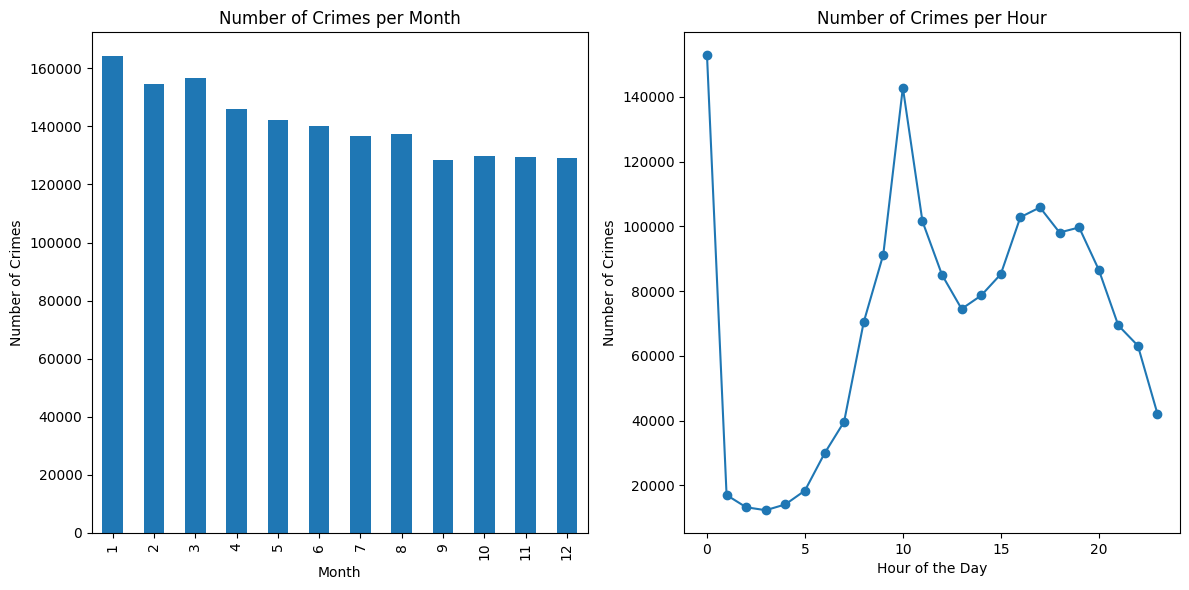

In [36]:
df['Year'] = df['Offence_From_Date'].dt.year
df['Month'] = df['Offence_From_Date'].dt.month
df['Day'] = df['Offence_From_Date'].dt.day
df['Hour'] = df['Offence_From_Date'].dt.hour

# Analyzing seasonal patterns
# For example, you can analyze the number of crimes per month or per hour using groupby
monthly_crime = df.groupby('Month').size()
hourly_crime = df.groupby('Hour').size()

# Creating visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_crime.plot(kind='bar')
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

plt.subplot(1, 2, 2)
hourly_crime.plot(kind='line', marker='o')
plt.title('Number of Crimes per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No', 'Day', 'Hour'],
      dtype='object')

The most common type of crime is 'MOTOR VEHICLE ACCIDENTS NON-FATAL' with 245780 reported incidents.


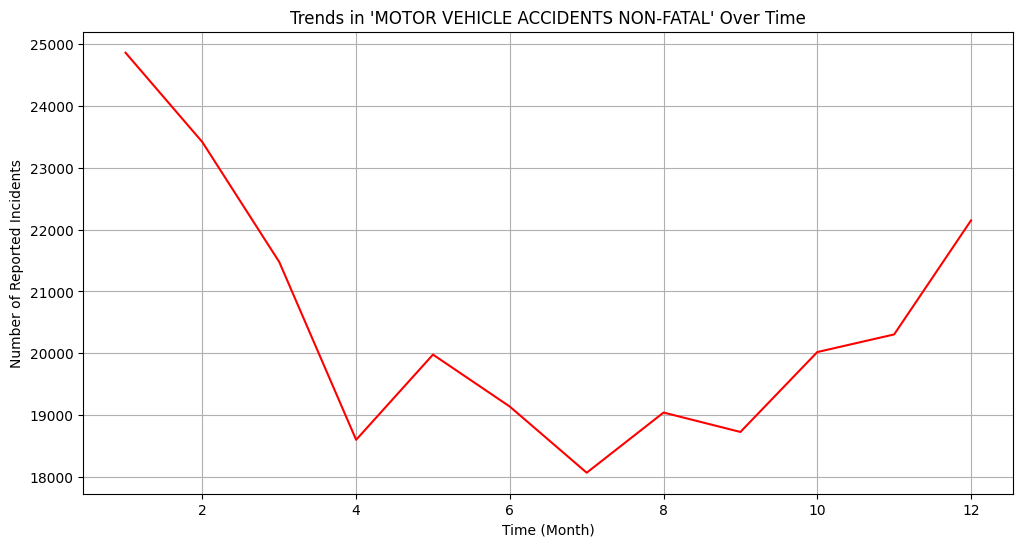

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
crime_type_counts = df[ 'CrimeGroup_Name'].value_counts()
# Identifying the most common crime type
most_common_crime = crime_type_counts.idxmax()
most_common_crime_count = crime_type_counts.max()
print(f"The most common type of crime is '{most_common_crime}' with {most_common_crime_count} reported incidents.")
# Time Series Analysis
# Group data by month and count incidents for the most common crime
df['Offence_From_Date'] = df['Offence_From_Date'].dt.to_period('M')
most_common_crime_data = df[df[ 'CrimeGroup_Name'] == most_common_crime].groupby('Month').size()

plt.figure(figsize=(12, 6))
most_common_crime_data.plot(kind='line', color='red')
plt.title(f"Trends in '{most_common_crime}' Over Time")
plt.xlabel("Time (Month)")
plt.ylabel("Number of Reported Incidents")
plt.grid(True)
plt.show()

In [39]:
df

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2015     12   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

        Offence_From_Date          Offence_To_Date         FIR_Reg_DateTime  \
0                 2015-12  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000   
1                 2016-01  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000   
2                 2016-01  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000   
3                 2016-01  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000   
4                 2016-01  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000   
...                   ...                      ...                      ...   
1694186           2024-01  2024-01-10 21:30:00.000  2024-01-11 21:30:00.000   
1694187           2024-01  2024-01-19 22:35:00.000  2024-01-29 19:30:00.000   
1694188           2024-02  2024-02-06 15:45:00.000  2024-02-07 17:45:00.000   
1694189           2024-02  2024-02-19 12:15:00.000  2024-02-24 17:00:00.000   
1694190           2024-02  2024-02-26 22:45:00.000  2024-02-28 18:30:00.000   

           FIR_Date  ... Arrested Male Arrested Female Arrested Count\tNo.  \
0        05/01/2016  ...             1               0                   1   
1        12/01/2016  ...             5               0                   5   
2        12/01/2016  ...             1               0                   1   
3        15/01/2016  ...             1               0                   1   
4        18/01/2016  ...             1               0                   1   
...             ...  ...           ...             ...                 ...   
1694186  11/01/2024  ...             0               0                   0   
1694187  29/01/2024  ...             0               0                   0   
1694188  07/02/2024  ...             0               0                   0   
1694189  24/02/2024  ...             0               0                   0   
1694190  28/02/2024  ...             0               0                   0   

        Accused_ChargeSheeted Count Conviction Count      FIR_ID  Unit_ID  \
0                                 1                0  2016000002     1245   
1                                 5                2  2016000003     1245   
2                                 1                0  2016000004     1245   
3                                 1                0  2016000005     1245   
4                                 1                0  2016000006     1245   
...                             ...              ...         ...      ...   
1694186                           0                0  2024000002     2183   
1694187                           0                0  2024000003     2183   
1694188                           0                0  2024000004     2183   
1694189                           0                0  2024000005     2183   
1694190                           0                0  2024000006     2183   

                  Crime_No Day Hour  
0        10470124520160001  27   12  
1        10470124520160002  12   17  
2        10470124520160003  12   17  
3        10470124520160004  14   21  
4        10470124520160005  18   15  
...                    ...  ..  ...  
1694186  10978218320240002  10    5  
1694187  10978218320240003  19   22  
16

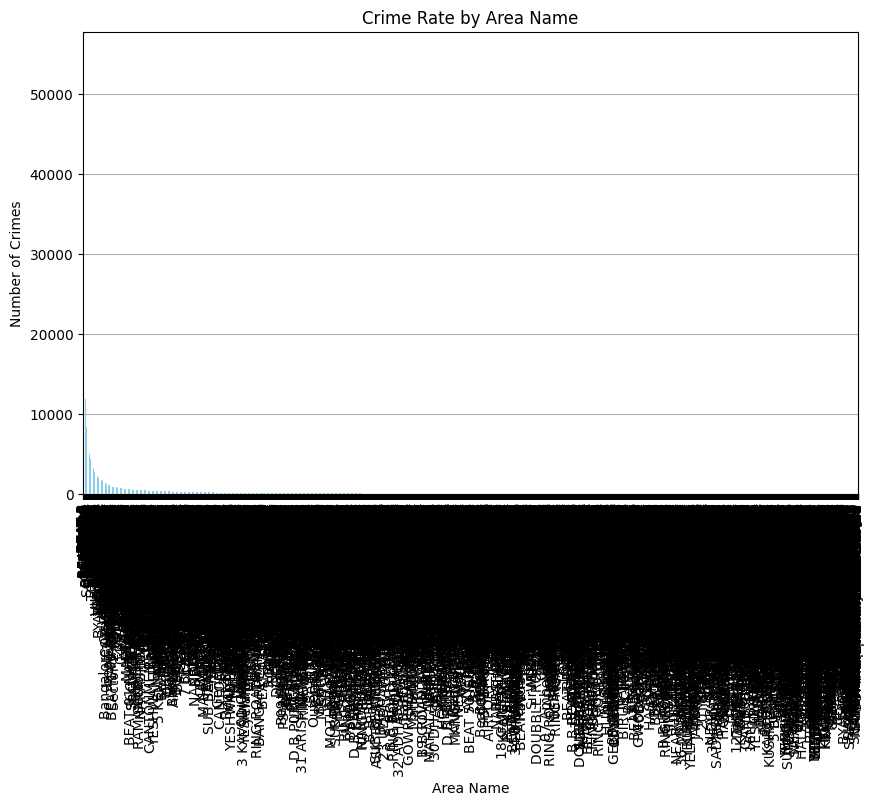

In [40]:


# Grouping by 'AREA NAME' to analyze the crime rate for each area
crime_rate_by_area = df['Beat_Name'].value_counts()

# Creating a bar plot to compare the crime rates between different areas
plt.figure(figsize=(10, 6))
crime_rate_by_area.plot(kind='bar', color='skyblue')
plt.title('Crime Rate by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

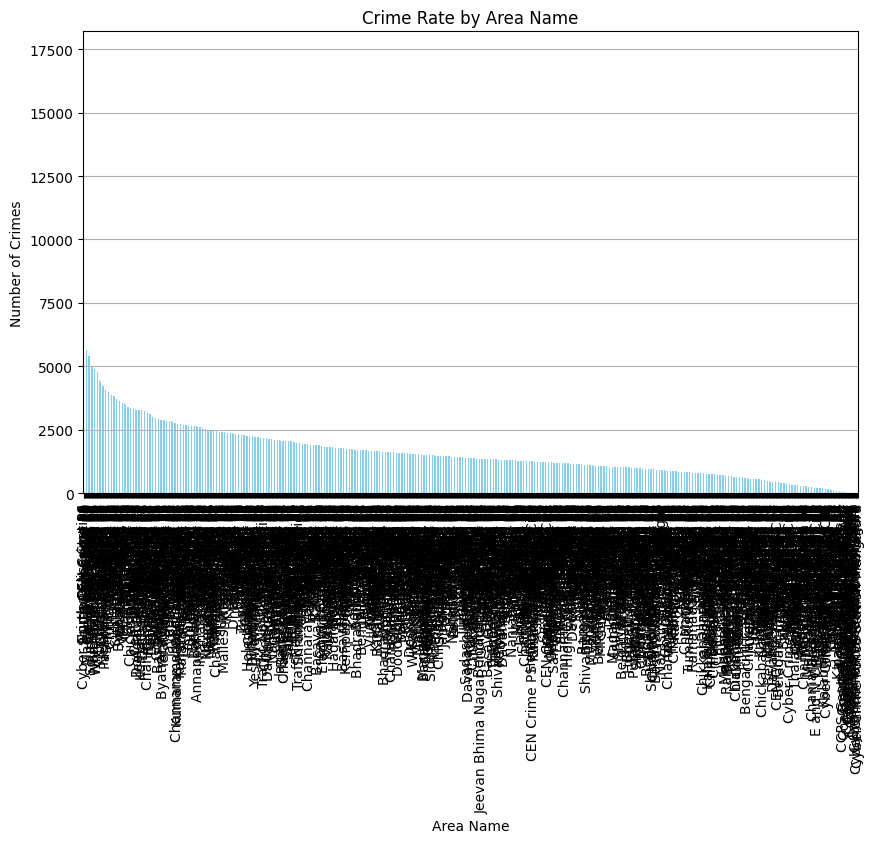

In [41]:


# Grouping by 'AREA NAME' to analyze the crime rate for each area
crime_rate_by_area = df['UnitName'	].value_counts()

# Creating a bar plot to compare the crime rates between different areas
plt.figure(figsize=(10, 6))
crime_rate_by_area.plot(kind='bar', color='skyblue')
plt.title('Crime Rate by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

In [42]:
pip install plotly


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [43]:
        import pandas as pd
import plotly.express as px

# Grouping by 'AREA NAME' to analyze the crime rate for each area
crime_rate_by_area = df['UnitName'].value_counts().reset_index()
crime_rate_by_area.columns = ['Area Name', 'Number of Crimes']

# Creating a bar plot using Plotly
fig = px.bar(crime_rate_by_area, x='Area Name', y='Number of Crimes', 
             title='Crime Rate by Area Name', 
             labels={'Number of Crimes': 'Number of Crimes'},
             color='Area Name')

fig.update_layout(xaxis_title='Area Name', yaxis_title='Number of Crimes')
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [44]:
df

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2015     12   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

        Offence_From_Date          Offence_To_Date         FIR_Reg_DateTime  \
0                 2015-12  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000   
1                 2016-01  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000   
2                 2016-01  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000   
3                 2016-01  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000   
4                 2016-01  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000   
...                   ...                      ...                      ...   
1694186           2024-01  2024-01-10 21:30:00.000  2024-01-11 21:30:00.000   
1694187           2024-01  2024-01-19 22:35:00.000  2024-01-29 19:30:00.000   
1694188           2024-02  2024-02-06 15:45:00.000  2024-02-07 17:45:00.000   
1694189           2024-02  2024-02-19 12:15:00.000  2024-02-24 17:00:00.000   
1694190           2024-02  2024-02-26 22:45:00.000  2024-02-28 18:30:00.000   

           FIR_Date  ... Arrested Male Arrested Female Arrested Count\tNo.  \
0        05/01/2016  ...             1               0                   1   
1        12/01/2016  ...             5               0                   5   
2        12/01/2016  ...             1               0                   1   
3        15/01/2016  ...             1               0                   1   
4        18/01/2016  ...             1               0                   1   
...             ...  ...           ...             ...                 ...   
1694186  11/01/2024  ...             0               0                   0   
1694187  29/01/2024  ...             0               0                   0   
1694188  07/02/2024  ...             0               0                   0   
1694189  24/02/2024  ...             0               0                   0   
1694190  28/02/2024  ...             0               0                   0   

        Accused_ChargeSheeted Count Conviction Count      FIR_ID  Unit_ID  \
0                                 1                0  2016000002     1245   
1                                 5                2  2016000003     1245   
2                                 1                0  2016000004     1245   
3                                 1                0  2016000005     1245   
4                                 1                0  2016000006     1245   
...                             ...              ...         ...      ...   
1694186                           0                0  2024000002     2183   
1694187                           0                0  2024000003     2183   
1694188                           0                0  2024000004     2183   
1694189                           0                0  2024000005     2183   
1694190                           0                0  2024000006     2183   

                  Crime_No Day Hour  
0        10470124520160001  27   12  
1        10470124520160002  12   17  
2        10470124520160003  12   17  
3        10470124520160004  14   21  
4        10470124520160005  18   15  
...                    ...  ..  ...  
1694186  10978218320240002  10    5  
1694187  10978218320240003  19   22  
16

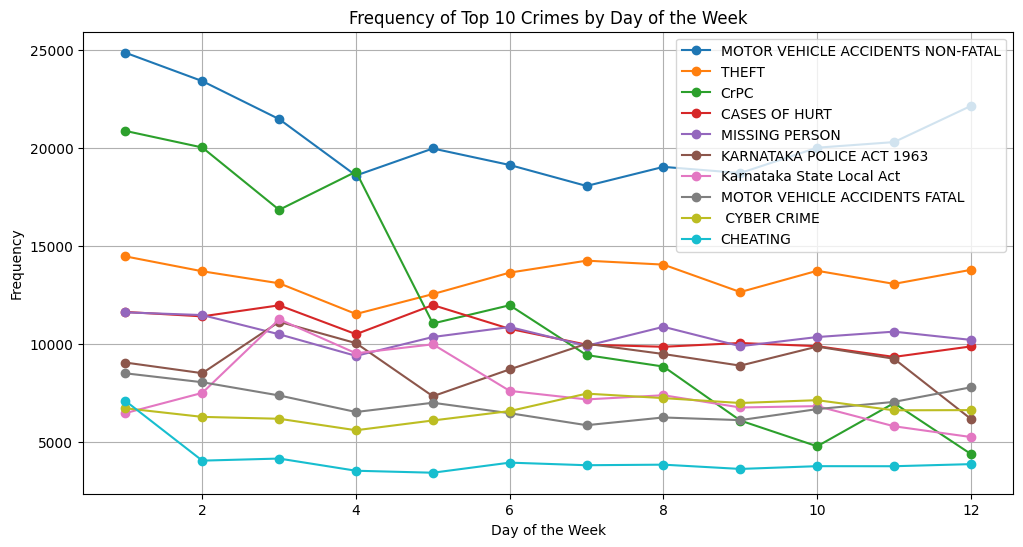

In [45]:
grouped_data = df.groupby(['Month', 'CrimeGroup_Name']).size().reset_index(name='Frequency')

# Identify the top 10 types of crimes based on frequency
top_10_crimes = grouped_data.groupby('CrimeGroup_Name').sum().nlargest(10, 'Frequency').index

# Filter the DataFrame for the top 10 types of crimes
top_10_crimes_df = grouped_data[grouped_data['CrimeGroup_Name'].isin(top_10_crimes)]

# Create a bar plot to represent the relationship between the day of the week and the frequency of the top 10 types of crimes
plt.figure(figsize=(12, 6))
for crime in top_10_crimes:
    data = top_10_crimes_df[top_10_crimes_df['CrimeGroup_Name'] == crime]
    plt.plot(data['Month'], data['Frequency'], marker='o', label=crime)

plt.title('Frequency of Top 10 Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df1.dtypes

District_Name                   object
UnitName                        object
FIRNo                           object
RI                               int64
Year                             int64
Month                            int64
Offence_From_Date               object
Offence_To_Date                 object
FIR_Reg_DateTime                object
FIR_Date                        object
FIR Type                        object
FIR_Stage                       object
Complaint_Mode                  object
CrimeGroup_Name                 object
CrimeHead_Name                  object
Latitude                       float64
Longitude                      float64
ActSection                      object
IOName                          object
KGID                            object
IOAssigned_Date                 object
Internal_IO                      int64
Place of Offence                object
Distance from PS                object
Beat_Name                       object
Village_Area_Name        

In [47]:
df1

District_Name          UnitName      FIRNo  RI  Year  Month  \
0            Bagalkot        Amengad PS  0001/2016   1  2016      1   
1            Bagalkot        Amengad PS  0002/2016   1  2016      1   
2            Bagalkot        Amengad PS  0003/2016   1  2016      1   
3            Bagalkot        Amengad PS  0004/2016   1  2016      1   
4            Bagalkot        Amengad PS  0005/2016   1  2016      1   
...               ...               ...        ...  ..   ...    ...   
1694186        Yadgir  Yadgiri Women PS  0002/2024   1  2024      1   
1694187        Yadgir  Yadgiri Women PS  0003/2024   1  2024      1   
1694188        Yadgir  Yadgiri Women PS  0004/2024   1  2024      2   
1694189        Yadgir  Yadgiri Women PS  0005/2024   1  2024      2   
1694190        Yadgir  Yadgiri Women PS  0006/2024   1  2024      2   

               Offence_From_Date          Offence_To_Date  \
0        2015-12-27 12:00:00.000  2015-12-27 12:05:00.000   
1        2016-01-12 17:30:00.000  2016-01-12 17:35:00.000   
2        2016-01-12 17:45:00.000  2016-01-12 17:50:00.000   
3        2016-01-14 21:30:00.000  2016-01-14 21:35:00.000   
4        2016-01-18 15:00:00.000  2016-01-18 15:05:00.000   
...                          ...                      ...   
1694186  2024-01-10 05:30:00.000  2024-01-10 21:30:00.000   
1694187  2024-01-19 22:30:00.000  2024-01-19 22:35:00.000   
1694188  2024-02-06 15:42:00.000  2024-02-06 15:45:00.000   
1694189  2024-02-19 12:10:00.000  2024-02-19 12:15:00.000   
1694190  2024-02-26 22:30:00.000  2024-02-26 22:45:00.000   

                FIR_Reg_DateTime    FIR_Date  ... VICTIM COUNT Accused Count  \
0        2016-01-05 11:00:00.000  05/01/2016  ...            0             1   
1        2016-01-12 19:00:00.000  12/01/2016  ...            0             5   
2        2016-01-12 19:30:00.000  12/01/2016  ...            0             1   
3        2016-01-15 14:00:00.000  15/01/2016  ...            0             1   
4        2016-01-18 19:30:00.000  18/01/2016  ...            0             1   
...                          ...         ...  ...          ...           ...   
1694186  2024-01-11 21:30:00.000  11/01/2024  ...            0             0   
1694187  2024-01-29 19:30:00.000  29/01/2024  ...            0             1   
1694188  2024-02-07 17:45:00.000  07/02/2024  ...            0             1   
1694189  2024-02-24 17:00:00.000  24/02/2024  ...            0             5   
1694190  2024-02-28 18:30:00.000  28/02/2024  ...            0             1   

        Arrested Male Arrested Female Arrested Count\tNo.  \
0                   1               0                   1   
1                   5               0                   5   
2                   1               0                   1   
3                   1               0                   1   
4                   1               0                   1   
...               ...             ...                 ...   
1694186             0               0                   0   
1694187             0               0                   0   
1694188             0               0                   0   
1694189             0               0                   0   
1694190             0               0                   0   

         Accused_ChargeSheeted Count  Conviction Count      FIR_ID Unit_ID  \
0                                  1                 0  2016000002    1245   
1                                  5                 2  2016000003    1245   
2                                  1                 0  2016000004    1245   
3                                  1                 0  2016000005    1245   
4                                  1                 0  2016000006    1245   
...                              ...               ...         ...     ...   
1694186                            0                 0  2024000002    2183   
1694187                            0                 0  2024000003    2183   
1694188                   

In [48]:
df1['day'] = 1

In [49]:
df1['DT'] = pd.to_datetime(df1[['Year', 'Month', 'day']])

In [50]:
df1.head()

District_Name    UnitName      FIRNo  RI  Year  Month  \
0      Bagalkot  Amengad PS  0001/2016   1  2016      1   
1      Bagalkot  Amengad PS  0002/2016   1  2016      1   
2      Bagalkot  Amengad PS  0003/2016   1  2016      1   
3      Bagalkot  Amengad PS  0004/2016   1  2016      1   
4      Bagalkot  Amengad PS  0005/2016   1  2016      1   

         Offence_From_Date          Offence_To_Date         FIR_Reg_DateTime  \
0  2015-12-27 12:00:00.000  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000   
1  2016-01-12 17:30:00.000  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000   
2  2016-01-12 17:45:00.000  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000   
3  2016-01-14 21:30:00.000  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000   
4  2016-01-18 15:00:00.000  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000   

     FIR_Date  ... Arrested Male Arrested Female Arrested Count\tNo.  \
0  05/01/2016  ...             1               0                   1   
1  12/01/2016  ...             5               0                   5   
2  12/01/2016  ...             1               0                   1   
3  15/01/2016  ...             1               0                   1   
4  18/01/2016  ...             1               0                   1   

  Accused_ChargeSheeted Count Conviction Count      FIR_ID  Unit_ID  \
0                           1                0  2016000002     1245   
1                           5                2  2016000003     1245   
2                           1                0  2016000004     1245   
3                           1                0  2016000005     1245   
4                           1                0  2016000006     1245   

            Crime_No day         DT  
0  10470124520160001   1 2016-01-01  
1  10470124520160002   1 2016-01-01  
2  10470124520160003   1 2016-01-01  
3  10470124520160004   1 2016-01-01  
4  10470124520160005   1 2016-01-01  

[5 rows x 43 columns]

In [51]:
df1.drop(['Year', 'Month', 'day'],axis=1,inplace=True)

In [52]:
df.head()

District_Name    UnitName      FIRNo  RI  Year  Month Offence_From_Date  \
0      Bagalkot  Amengad PS  0001/2016   1  2015     12           2015-12   
1      Bagalkot  Amengad PS  0002/2016   1  2016      1           2016-01   
2      Bagalkot  Amengad PS  0003/2016   1  2016      1           2016-01   
3      Bagalkot  Amengad PS  0004/2016   1  2016      1           2016-01   
4      Bagalkot  Amengad PS  0005/2016   1  2016      1           2016-01   

           Offence_To_Date         FIR_Reg_DateTime    FIR_Date  ...  \
0  2015-12-27 12:05:00.000  2016-01-05 11:00:00.000  05/01/2016  ...   
1  2016-01-12 17:35:00.000  2016-01-12 19:00:00.000  12/01/2016  ...   
2  2016-01-12 17:50:00.000  2016-01-12 19:30:00.000  12/01/2016  ...   
3  2016-01-14 21:35:00.000  2016-01-15 14:00:00.000  15/01/2016  ...   
4  2016-01-18 15:05:00.000  2016-01-18 19:30:00.000  18/01/2016  ...   

  Arrested Male Arrested Female Arrested Count\tNo.  \
0             1               0                   1   
1             5               0                   5   
2             1               0                   1   
3             1               0                   1   
4             1               0                   1   

  Accused_ChargeSheeted Count Conviction Count      FIR_ID  Unit_ID  \
0                           1                0  2016000002     1245   
1                           5                2  2016000003     1245   
2                           1                0  2016000004     1245   
3                           1                0  2016000005     1245   
4                           1                0  2016000006     1245   

            Crime_No Day Hour  
0  10470124520160001  27   12  
1  10470124520160002  12   17  
2  10470124520160003  12   17  
3  10470124520160004  14   21  
4  10470124520160005  18   15  

[5 rows x 43 columns]

In [53]:
date_counts = df1.groupby('DT').size().reset_index(name='counts')


In [54]:
date_counts

DT  counts
0  2016-01-01   21310
1  2016-02-01   21124
2  2016-03-01   19629
3  2016-04-01   17458
4  2016-05-01   18514
..        ...     ...
94 2023-11-01   18906
95 2023-12-01   19385
96 2024-01-01   18045
97 2024-02-01   18831
98 2024-03-01    5868

[99 rows x 2 columns]

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694191 entries, 0 to 1694190
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   District_Name                object        
 1   UnitName                     object        
 2   FIRNo                        object        
 3   RI                           int64         
 4   Offence_From_Date            object        
 5   Offence_To_Date              object        
 6   FIR_Reg_DateTime             object        
 7   FIR_Date                     object        
 8   FIR Type                     object        
 9   FIR_Stage                    object        
 10  Complaint_Mode               object        
 11  CrimeGroup_Name              object        
 12  CrimeHead_Name               object        
 13  Latitude                     float64       
 14  Longitude                    float64       
 15  ActSection                   object        
 16  

In [56]:
df1['Day_of_Week']=df1['DT'].dt.day_name()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame 'cdd' containing the data, and 'DT' is the date column
cdd['DT'] = pd.to_datetime(cdd['DT'])

# Grouping by 'DT' and counting the total number of complaints
complaints_occurrences = cdd.groupby('DT').size().sort_index()

# Plotting the time series data
complaints_occurrences.plot(figsize=(12, 6))
plt.title('Complaints Occurrences over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Fitting the ARIMA model
model = ARIMA(complaints_occurrences, order=(5, 1, 0))  # Example ARIMA parameters, tune as needed
model_fit = model.fit()

# Forecasting future complaints occurrences
future_forecast = model_fit.predict(start=len(complaints_occurrences), end=len(complaints_occurrences) + 48, typ='levels')  # Forecasting for 48 periods (months)

# Creating future date index till 2025
future_dates = pd.date_range(start=complaints_occurrences.index[-1], periods=49, freq='M')

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Complaints': future_forecast})
future_df.set_index('Date', inplace=True)

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(complaints_occurrences, label='Observed')
plt.plot(future_df, label='Forecasted', linestyle='dashed')
plt.title('Complaints Occurrences Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend()
plt.show()


NameError: name 'cdd' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
# df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Creating a time series for analysis
crime_series = pd.Series(crime_occurrences, index=pd.to_datetime(crime_occurrences.index))

# Fitting the Exponential Smoothing model
model = ExponentialSmoothing(crime_series, seasonal='add', seasonal_periods=12)  # Example parameters, tune as needed
model_fit = model.fit()

# Forecasting future crime occurrences
future_forecast = model_fit.forecast(steps=24)  # Forecasting for 24 periods (months)

# Creating future date index till 2025
future_dates = pd.date_range(start=crime_series.index[-1], periods=25, freq='M')

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates[1:], 'Forecasted Crime Occurrences': future_forecast})
future_df.set_index('Date', inplace=True)

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_series, label='Observed')
plt.plot(future_df, label='Forecasted', linestyle='dashed')
plt.title('Crime Occurrences Time Series Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:
village_area_dict = df1['Village_Area_Name'].to_dict()
print(type(village_area_dict))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
# df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Creating a time series for analysis
crime_series = pd.Series(crime_occurrences, index=pd.to_datetime(crime_occurrences.index))

# Performing STL decomposition
stl = STL(crime_series, seasonal=13)  # Example seasonal period, adjust as needed
result = stl.fit()

# Plotting the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series data (replace this with your own time series data)
# For demonstration purposes, let's generate a simple example
np.random.seed(0)
time_index = pd.date_range(start='2022-01-01', periods=100)
data = np.random.randn(100)
ts = pd.Series(data, index=time_index)

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(ts)
plt.title('Example Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the autocorrelation and partial autocorrelation functions to determine ARIMA parameters
plot_acf(ts)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(ts)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Fit ARIMA model
# Example: ARIMA(1, 1, 1)
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Print summary of the model
print(results.summary())

# Plot residuals
residuals = results.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1, 1, 1) Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Forecast future values
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values for the next", forecast_steps, "steps:")
print(forecast)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'ts' is your time series data
# Extend the time index to include future dates for the next 5 years
future_dates = pd.date_range(start=ts.index[-1], periods=5*12+1, freq='M')[1:]

# Forecast future values
forecast_steps = len(future_dates)
forecast = results.forecast(steps=forecast_steps)

# Plot the original time series data and the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Original Data', color='blue')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Original Data and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
# df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Creating a time series for analysis
crime_series = pd.Series(crime_occurrences, index=pd.to_datetime(crime_occurrences.index))

# Fitting the SARIMA model
order = (1, 1, 1)  # Example order parameters (p, d, q), tune as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order parameters (P, D, Q, s), tune as needed
model = SARIMAX(crime_series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting future crime occurrences
forecast_steps = 24  # Example forecast steps, adjust as needed
future_forecast = model_fit.forecast(steps=forecast_steps)

# Creating future date index till 2025
future_dates = pd.date_range(start=crime_series.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Crime Occurrences': future_forecast})

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_series, label='Observed')
plt.plot(future_df['Date'], future_df['Forecasted Crime Occurrences'], label='Forecasted', linestyle='dashed')
plt.title('Crime Occurrences Time Series Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
# df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Creating a time series for analysis
crime_series = pd.Series(crime_occurrences, index=pd.to_datetime(crime_occurrences.index))

# Fitting the SARIMAX model
order = (1, 1, 1)  # Example order parameters (p, d, q), tune as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order parameters (P, D, Q, s), tune as needed
model = SARIMAX(crime_series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting future crime occurrences
forecast_steps = 24  # Example forecast steps, adjust as needed
future_forecast = model_fit.forecast(steps=forecast_steps)

# Creating future date index till 2025
future_dates = pd.date_range(start=crime_series.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Crime Occurrences': future_forecast})

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_series, label='Observed')
plt.plot(future_df['Date'], future_df['Forecasted Crime Occurrences'], label='Forecasted', linestyle='dashed')
plt.title('Crime Occurrences Time Series Forecast using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:
df1.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
if 'DT' in df1.columns:
    df1['DT'] = pd.to_datetime(df1['DT'])

    # Grouping by 'DT' and counting the occurrences of crime
    crime_occurrences = df1['DT'].value_counts().sort_index()

    # Plotting the time series data
    crime_occurrences.plot(figsize=(12, 6))
    plt.title('Crime Occurrences over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Occurrences')
    plt.show()

    # Fitting the ARIMA model
    model = ARIMA(crime_occurrences, order=(5, 1, 0))  # Example ARIMA parameters, tune as needed
    model_fit = model.fit()

    # Forecasting future crime occurrences
    future_forecast = model_fit.predict(start=len(crime_occurrences), end=len(crime_occurrences) + 48, typ='levels')  # Forecasting for 48 periods (months)

    # Creating future date index till 2025
    future_dates = pd.date_range(start=crime_occurrences.index[-1], periods=49, freq='M')

    # Creating a DataFrame for future predictions
    future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Crime Occurrences': future_forecast})
    future_df.set_index('Date', inplace=True)

    # Plotting the forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(crime_occurrences, label='Observed')
    plt.plot(future_df, label='Forecasted', linestyle='dashed')
    plt.title('Crime Occurrences Time Series Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Occurrences')
    plt.legend()
    plt.show()
else:
    print("Column 'DT' not found in DataFrame.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Plotting the time series data
crime_occurrences.plot(figsize=(12, 6))
plt.title('Crime Occurrences over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.show()

# Fitting the ARIMA model
model = ARIMA(crime_occurrences, order=(5, 1, 0))  # Example ARIMA parameters, tune as needed
model_fit = model.fit()

# Forecasting future crime occurrences
future_forecast = model_fit.predict(start=len(crime_occurrences), end=len(crime_occurrences) + 48, typ='levels')  # Forecasting for 48 periods (months)

# Creating future date index till 2025
future_dates = pd.date_range(start=crime_occurrences.index[-1], periods=49, freq='M')

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Crime Occurrences': future_forecast})
future_df.set_index('Date', inplace=True)

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_occurrences, label='Observed')
plt.plot(future_df, label='Forecasted', linestyle='dashed')
plt.title('Crime Occurrences Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate synthetic data
np.random.seed(0)
X = np.random.uniform(0, 10, 20)[:, np.newaxis]
y = np.sin(X).ravel()

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize and fit the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Make predictions
x_pred = np.linspace(0, 10, 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='r', s=50, label='Data')
plt.plot(x_pred, y_pred, 'k', lw=2, zorder=9, label='Predicted mean')
plt.fill_between(x_pred[:, 0], y_pred - sigma, y_pred + sigma, alpha=0.2, color='k')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()


In [ ]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a LabelEncoder object and fit it to each feature in data

# encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()

In [ ]:
# Fit and Transform 
# use df.apply() to apply le.fit_transform to all columns

df = data.astype(str).apply(le.fit_transform)
df.head()

In [ ]:
adf = pd.read_csv('/kaggle/input/predictive-crime-analysis/AccusedData.csv')
adf

In [ ]:
cdd = pd.read_csv('/kaggle/input/predictive-crime-analysis/ComplainantDetailsData.csv')
cdd

In [ ]:
vid= pd.read_csv('/kaggle/input/predictive-crime-analysis/VictimInfoDetails.csv')
vid

In [ ]:
vid.info()

In [ ]:
# ImpLabelEncoderort preprocessing from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a LabelEncoder object and fit it to each feature in data

# encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()

In [ ]:
# Fit and Transform 
# use df.apply() to apply le.fit_transform to all columns

vid = data.astype(object).apply(le.fit_transform)
vid.head()

In [ ]:
vid= pd.read_csv('/kaggle/input/predictive-crime-analysis/VictimInfoDetails.csv')
vid


In [ ]:
cdd = pd.read_csv('/kaggle/input/predictive-crime-analysis/ComplainantDetailsData.csv')
cdd

In [ ]:
adf = pd.read_csv('/kaggle/input/predictive-crime-analysis/AccusedData.csv')
adf

In [ ]:
adf.info()

In [ ]:
vid['Caste'].isnull().sum()

In [ ]:
vid['Caste'].isnull().sum()
vid.dropna(subset=['Caste'], inplace=True)
vid['Caste'].isnull().sum()

In [ ]:
vid['Caste'].isnull().sum()

In [ ]:
vid


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Caste' column
caste_counts = vid['Caste'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
caste_counts.plot(kind='bar')
plt.title('Count of FIRs by Caste')
plt.xlabel('Caste')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Count the occurrences of each unique value in the 'Caste' column
caste_counts = vid['Caste'].value_counts()

# Create a Plotly bar graph
fig = px.bar(x=caste_counts.index, y=caste_counts.values, labels={'x':'Caste', 'y':'Count'},
             title='Count of FIRs by Caste')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='', yaxis_title='Count', title_font_size=20)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Count the occurrences of each unique value in the 'Sex' column
sex_counts = vid['Sex'].value_counts()

# Create a Plotly bar graph
fig = px.bar(x=sex_counts.index, y=sex_counts.values, labels={'x':'Sex', 'y':'Count'},
             title='Distribution of Sex')

# Customize the layout
fig.update_layout(xaxis_title='', yaxis_title='Count', title_font_size=20)

# Show the plot
fig.show()


In [ ]:
adf

In [ ]:
adf['Caste'].isnull().sum()
adf.dropna(subset=['Caste'], inplace=True)
adf['Caste'].isnull().sum()


In [ ]:
import plotly.express as px

# Count the occurrences of each unique value in the 'Caste' column
caste_counts = adf['Caste'].value_counts()

# Create a Plotly bar graph
fig = px.bar(x=caste_counts.index, y=caste_counts.values, labels={'x':'Caste', 'y':'Count'},
             title='Count of FIRs by Caste')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='', yaxis_title='Count', title_font_size=20)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'adf' containing the relevant data with an 'age' column

# Define age bins
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Categorize ages into bins
adf['Age_Group'] = pd.cut(adf['age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of accused individuals in each age group
age_counts = adf['Age_Group'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accused Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Filter rows where age is between 18 and 29
age_18_29 = adf[(adf['age'] >= 18) & (adf['age'] <= 29)]

# Group by caste and count occurrences
age_18_29_by_caste = age_18_29.groupby('Caste').size().reset_index(name='Count')

# Create a Plotly bar graph
fig = px.bar(age_18_29_by_caste, x='Caste', y='Count', labels={'Caste': 'Caste', 'Count': 'Count'},
             title='Distribution of Individuals Aged 18-29 by Caste')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='', yaxis_title='Count', title_font_size=20)

# Show the plot
fig.show()


In [ ]:
vid['Profession'].isnull().sum()

In [ ]:

vid.dropna(subset=['Profession'], inplace=True)
vid['Profession'].isnull().sum()

In [ ]:
import plotly.express as px

# Count the occurrences of each profession in the 'Profession' column
profession_counts = vid['Profession'].value_counts().reset_index()

# Create a Plotly bar graph
fig = px.bar(profession_counts, x=profession_counts.index, y='Profession', labels={'index': 'Profession', 'Profession': 'Count'},
             title='Distribution of Victims by Profession')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Profession', yaxis_title='Count', title_font_size=20)

# Show the plot
fig.show()


In [ ]:
en_vid= pd.read_csv('/kaggle/input/predictive-crime-analysis/encoding_data_vid.csv')

In [ ]:
en_vid.columns

In [ ]:
# Select the columns for which you want to compute the correlation matrix
columns_of_interest = ['District_Name', 'UnitName', 'FIRNo', 'FIR Type',
       'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name', 'CrimeHead_Name',
       'ActSection', 'IOName', 'KGID', 'IOAssigned_Date', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Response_Time']

# Compute correlation matrix
corr = en_vid[columns_of_interest].corr()

# Apply background gradient
corr.style.background_gradient(cmap='coolwarm')


In [ ]:
vid


In [ ]:
# Select the columns for which you want to compute the correlation matrix
columns_of_interest = ['District_Name', 'UnitName', 'FIRNo', 'FIR Type',
       'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name', 'CrimeHead_Name',
       'ActSection', 'IOName', 'KGID', 'IOAssigned_Date', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Response_Time']

# Compute correlation matrix
corr = en_vid[columns_of_interest].corr()

# Apply background gradient
corr.style.background_gradient(cmap='coolwarm')


In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'UnitName' and 'CrimeHead_Name', and count the number of cases
crime_counts = vid.groupby(['UnitName', 'CrimeHead_Name']).size().reset_index(name='CaseCount')

# Find the top police stations with the highest number of cases for each type of crime
top_police_stations = crime_counts.groupby('CrimeHead_Name').apply(lambda x: x.nlargest(1, 'CaseCount')).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(12, 8))
for idx, crime in enumerate(top_police_stations['CrimeHead_Name']):
    station = top_police_stations.loc[top_police_stations['CrimeHead_Name'] == crime, 'UnitName'].values[0]
    case_count = top_police_stations.loc[top_police_stations['CrimeHead_Name'] == crime, 'CaseCount'].values[0]
    plt.barh(crime, case_count, color='skyblue')
    plt.text(case_count, idx, f'{case_count}', ha='left', va='center')
plt.xlabel('Number of Cases')
plt.ylabel('Type of Crime')
plt.title('Top Police Stations with Highest Number of Cases for Each Type of Crime')
plt.tight_layout()
plt.show()



In [ ]:
vid.columns

In [ ]:
df1

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'UnitName' and 'CrimeHead_Name', and count the number of cases
crime_counts = df1.groupby(['UnitName', 'CrimeHead_Name']).size().reset_index(name='CaseCount')

# Find the top 10 police stations with the highest number of cases
top_police_stations = crime_counts.groupby('UnitName')['CaseCount'].sum().nlargest(10).index

# Filter crime counts for the top 10 police stations
top_crime_counts = crime_counts[crime_counts['UnitName'].isin(top_police_stations)]

# Find the most common crime for each top police station
most_common_crime = top_crime_counts.loc[top_crime_counts.groupby('UnitName')['CaseCount'].idxmax()]

# Plot the results
plt.figure(figsize=(12, 8))
for idx, (station, crime, case_count) in enumerate(zip(most_common_crime['UnitName'], most_common_crime['CrimeHead_Name'], most_common_crime['CaseCount'])):
    plt.barh(station, case_count, color='skyblue')
    plt.text(case_count, idx, f'{crime}\n{case_count}', ha='left', va='center')
plt.xlabel('Number of Cases')
plt.ylabel('Police Station')
plt.title('Most Common Crime in Top 10 Police Stations')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(most_common_crime['UnitName'], most_common_crime['CaseCount'], color='skyblue')
for idx, (station, crime, case_count) in enumerate(zip(most_common_crime['UnitName'], most_common_crime['CrimeHead_Name'], most_common_crime['CaseCount'])):
    plt.text(case_count, idx, f'{crime}\n{case_count}', ha='left', va='center')
plt.xlabel('Number of Cases')
plt.ylabel('Police Station')
plt.title('Most Common Crime in Top 10 Police Stations')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array to represent the number of cases for each police station and crime
heatmap_data = np.zeros((len(top_police_stations), len(most_common_crime)), dtype=int)
for idx, (station, crime, case_count) in enumerate(zip(most_common_crime['UnitName'], most_common_crime['CrimeHead_Name'], most_common_crime['CaseCount'])):
    heatmap_data[idx, idx] = case_count

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='Blues', interpolation='nearest')

# Add labels to the axes
plt.xticks(np.arange(len(most_common_crime)), most_common_crime['CrimeHead_Name'], rotation=45)
plt.yticks(np.arange(len(top_police_stations)), most_common_crime['UnitName'])

# Add color bar
plt.colorbar(label='Number of Cases')

# Add text annotations for each cell
for i in range(len(top_police_stations)):
    for j in range(len(most_common_crime)):
        plt.text(j, i, heatmap_data[i, j], ha='center', va='center', color='black')

# Set axis labels and title
plt.xlabel('Crime')
plt.ylabel('Police Station')
plt.title('Most Common Crime in Top 10 Police Stations')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a trace for the heatmap
heatmap_trace = go.Heatmap(
    z=heatmap_data,
    x=most_common_crime['CrimeHead_Name'],
    y=most_common_crime['UnitName'],
    colorscale='Blues',
    colorbar=dict(title='Number of Cases')
)

# Create a figure and add the heatmap trace
fig = go.Figure(data=heatmap_trace)

# Update layout
fig.update_layout(
    title='Most Common Crime in Top 10 Police Stations',
    xaxis=dict(title='Crime'),
    yaxis=dict(title='Police Station'),
    height=600,
    width=800
)

# Show the plot
fig.show()


In [ ]:
# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Group the filtered data by police station and count the number of cases
rape_counts = rape_data['UnitName'].value_counts()

# Find the police station(s) with the highest number of rape cases
top_rape_ps = rape_counts.nlargest(1)

print("Police Station(s) with the Highest Number of Rape Cases:")
print(top_rape_ps)


In [ ]:
# Group the data by police station and count the number of cases
ps_counts = df1['UnitName'].value_counts()

# Find the top 10 police stations with the highest number of cases
top_10_ps = ps_counts.nlargest(10)

# Retrieve data for the top 10 police
# Group the data by police station and count the number of cases
ps_counts = df1['UnitName'].value_counts()

# Find the top 10 police stations with the highest number of cases
top_10_ps = ps_counts.nlargest(10)

# Filter the data for the top 10 police stations
top_10_ps_data = df1[df1['UnitName'].isin(top_10_ps.index)]

# Display the data for the top 10 police stations
print("Data for Top 10 Police Stations:")
print(top_10_ps_data)


In [ ]:
import matplotlib.pyplot as plt

# Group the data by police station and count the number of cases
ps_counts = df1['UnitName'].value_counts()

# Find the top 10 police stations with the highest number of cases
top_10_ps = ps_counts.nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_ps.plot(kind='bar', color='skyblue')
plt.title('Top 10 Police Stations with the Highest Number of Cases')
plt.xlabel('Police Station')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Group the filtered data by police station and count the number of cases
rape_counts = rape_data['UnitName'].value_counts()

# Find the police station with the highest number of rape cases
highest_rape_ps = rape_counts.idxmax()
highest_rape_cases = rape_counts.max()

print("Police Station with the Highest Number of Rape Cases:")
print("Police Station:", highest_rape_ps)
print("Number of Rape Cases:", highest_rape_cases)


In [ ]:
df1

In [ ]:
# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Group the filtered data by police station and count the number of cases
rape_counts = rape_data['UnitName'].value_counts()

# Find the top N police stations with the highest number of rape cases
top_n_rape_ps = rape_counts.nlargest(50)  # Change 5 to the desired number of top police stations

print("Top Police Stations with the Highest Number of Rape Cases:")
for idx, (station, cases) in enumerate(zip(top_n_rape_ps.index, top_n_rape_ps.values), 1):
    print(f"{idx}. Police Station: {station}, Number of Rape Cases: {cases}")


In [ ]:
top_n_rape_ps

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Group the filtered data by police station and count the number of cases
rape_counts = rape_data['UnitName'].value_counts()

# Find the top 50 police stations with the highest number of rape cases
top_n_rape_ps = rape_counts.nlargest(50)

# Plot the bar graph
plt.figure(figsize=(12, 8))
top_n_rape_ps.plot(kind='bar', color='skyblue')
plt.title('Top Police Stations with the Highest Number of Rape Cases')
plt.xlabel('Police Station')
plt.ylabel('Number of Rape Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Group the filtered data by FIR_Date and count the number of cases
rape_counts_by_date = rape_data['FIR_Date'].value_counts().reset_index()
rape_counts_by_date.columns = ['FIR_Date', 'Number of Rape Cases']

# Plot the scatter plot
fig = px.scatter(rape_counts_by_date, x='FIR_Date', y='Number of Rape Cases',
                 title='Number of Rape Cases over FIR Date',
                 labels={'FIR_Date': 'FIR Date', 'Number of Rape Cases': 'Number of Cases'},
                 range_x=['2022-01-01', '2024-01-01'])  # Set the range of x-axis as needed

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Create the scatter plot
fig = px.scatter(rape_data, x='FIR_Date', y=rape_data.index, color='UnitName', 
                 title='Scatter Plot of Rape Cases over FIR Date',
                 labels={'FIR_Date': 'FIR Date', 'y': 'Number of Rape Cases'})

# Update layout
fig.update_layout(xaxis=dict(tickangle=45), height=600, width=800)

# Show the plot
fig.show()


In [ ]:
df1.columns

In [ ]:
df1.columns

In [ ]:
df1['Age 0']

In [ ]:
pip install fbprophet


In [ ]:
pip install pystan


In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Assuming you have a DataFrame 'df1' containing the data, and 'DT' is the date column
# df1['DT'] = pd.to_datetime(df1['DT'])

# Grouping by 'DT' and counting the occurrences of crime
crime_occurrences = df1['DT'].value_counts().sort_index()

# Creating a DataFrame with 'ds' (date) and 'y' (number of occurrences) columns
crime_df = pd.DataFrame({'ds': crime_occurrences.index, 'y': crime_occurrences.values})

# Initialize and fit Prophet model
model = Prophet()
model.fit(crime_df)

# Make future predictions
future_dates = model.make_future_dataframe(periods=24, freq='M')  # Forecasting for 24 periods (months)
forecast = model.predict(future_dates)

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_df['ds'], crime_df['y'], label='Observed')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted', linestyle='dashed')
plt.title('Crime Occurrences Time Series Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming you have a DataFrame 'df1' containing the data, and 'FIR_Date' is the date column
# Convert the 'FIR_Date' column to datetime using the correct format ("%d/%m/%Y")
df1['FIR_Date'] = pd.to_datetime(df1['FIR_Date'], format="%d/%m/%Y")

# Filter the data for rape-related crimes
rape_data = df1[df1['CrimeHead_Name'] == 'Rape']

# Grouping by 'FIR_Date' and counting the occurrences of rape cases
rape_occurrences = rape_data['FIR_Date'].value_counts().sort_index()

# Creating a DataFrame with 'ds' (date) and 'y' (number of occurrences) columns
rape_df = pd.DataFrame({'ds': rape_occurrences.index, 'y': rape_occurrences.values})

# Initialize and fit Prophet model
model = Prophet()
model.fit(rape_df)

# Make future predictions
future_dates = model.make_future_dataframe(periods=24, freq='M')  # Forecasting for 24 periods (months)
forecast = model.predict(future_dates)

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(rape_df['ds'], rape_df['y'], label='Observed')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted', linestyle='dashed')
plt.title('Rape Cases Time Series Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Number of Rape Cases')
plt.legend()
plt.show()
plt.show()


In [ ]:
df1['FIR_Date']

In [ ]:
# Assuming you have a DataFrame 'df1' containing the data, and 'FIR_Date' and 'CrimeHead_Name' are the relevant columns
# Filter the data to include only the relevant columns
crime_data = df1[['FIR_Date', 'CrimeHead_Name']]

# Group the data by 'CrimeHead_Name' and count the occurrences of each crime category
crime_counts = crime_data['CrimeHead_Name'].value_counts()

# Select the top ten most frequent crime categories
top_ten_crimes = crime_counts.nlargest(10).index

# Initialize an empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop through each selected crime category
for crime in top_ten_crimes:
    # Filter the data for the current crime category
    crime_occurrences = crime_data[crime_data['CrimeHead_Name'] == crime]['FIR_Date'].value_counts().sort_index()
    
    # Create a DataFrame with 'ds' (date) and 'y' (number of occurrences) columns
    crime_df = pd.DataFrame({'ds': crime_occurrences.index, 'y': crime_occurrences.values})
    
    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(crime_df)
    
    # Make future predictions
    future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 365 days
    forecast = model.predict(future_dates)
    forecast['CrimeHead_Name'] = crime  # Add the crime category as a column
    
    # Append the forecast to the DataFrame
    forecast_df = pd.concat([forecast_df, forecast[['ds', 'CrimeHead_Name', 'yhat', 'yhat_lower', 'yhat_upper']]])

# Plot the observed data and forecasted trends for each crime category
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for i, crime in enumerate(top_ten_crimes):
    ax = axes[i // 2, i % 2]
    crime_forecast = forecast_df[forecast_df['CrimeHead_Name'] == crime]
    ax.plot(crime_forecast['ds'], crime_forecast['yhat'], label='Forecasted', linestyle='dashed', color='red')
    ax.fill_between(crime_forecast['ds'], crime_forecast['yhat_lower'], crime_forecast['yhat_upper'], color='pink', alpha=0.5)
    ax.scatter(crime_df['ds'], crime_df['y'], label='Observed', color='blue')
    ax.set_title(f'Crime Trend Forecast for {crime}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Occurrences')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Group the data by both 'CrimeHead_Name' and 'UnitName' and count the occurrences
crime_area_counts = df1.groupby(['CrimeHead_Name', 'UnitName']).size().reset_index(name='Occurrences')

# Display the top few rows
print(crime_area_counts.head())


In [ ]:
 en_fir= pd.read_csv('/kaggle/input/predictive-crime-analysis/encoding_data_fir.csv')
 en_fir

In [ ]:
# Convert the data type of 'Beat_Name' column in the en_fir DataFrame to string
en_fir['Beat_Name'] = en_fir['Beat_Name'].astype(str)

# Merging the two DataFrames based on location information
merged_df = pd.merge(df1, en_fir, on='Beat_Name', how='left')

# Grouping the merged data by area (police station name) and crime type, and counting occurrences
crime_area_counts = merged_df.groupby(['UnitName', 'CrimeHead_Name']).size().reset_index(name='Occurrences')

# Display the top few rows
print(crime_area_counts.head())


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each Beat_Name
beat_counts = en_fir['Beat_Name'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
beat_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Frequent Cases in Each Beat Name')
plt.xlabel('Beat Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Count the occurrences of each Beat_Name
beat_counts = en_fir['Beat_Name'].value_counts()

# Select the top 50 areas with the highest number of cases
top_50_areas = beat_counts.nlargest(50)

# Display the top 50 areas
print(top_50_areas)


In [ ]:
import matplotlib.pyplot as plt

# Plot the top 50 areas with the highest number of cases
plt.figure(figsize=(12, 6))
top_50_areas.plot(kind='bar', color='skyblue')
plt.title('Top 50 Areas with the Highest Number of Cases')
plt.xlabel('Beat Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Count the occurrences of each Beat_Name
beat_counts = en_fir['Beat_Name'].value_counts()

# Select the top 50 areas with the highest number of cases
top_50_areas = beat_counts.nlargest(50)

# Display the top 50 areas
print(top_50_areas)

# Store the top 50 areas in a variable
top_50_areas_data = top_50_areas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming you have a DataFrame 'en_fir' containing the data, and 'Date' is the date column
# Convert the 'Date' column to datetime using the correct format ("%Y-%m-%d")
en_fir['Date'] = pd.to_datetime(en_fir['Date'], format="%Y-%m-%d")

# Grouping by 'Date' and 'Beat_Name' and counting the occurrences of crime
crime_occurrences = en_fir.groupby(['Date', 'Beat_Name']).size().reset_index(name='Crime_Count')

# Creating a DataFrame with 'ds' (date) and 'y' (number of occurrences) columns for Prophet modeling
crime_df = pd.DataFrame({'ds': crime_occurrences['Date'], 'y': crime_occurrences['Crime_Count']})

# Initialize and fit Prophet model
model = Prophet()
model.fit(crime_df)

# Make future predictions for each 'Beat_Name' location
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 365 days
forecast = model.predict(future_dates)

# Plotting the forecasted data
fig, ax = plt.subplots(figsize=(12, 6))
for beat_name in crime_occurrences['Beat_Name'].unique():
    # Filter forecast data for the specific 'Beat_Name'
    forecast_subset = forecast[forecast['ds'].isin(crime_df[crime_df['Beat_Name'] == beat_name]['ds'])]
    ax.plot(forecast_subset['ds'], forecast_subset['yhat'], label=beat_name)

plt.title('Forecasted Crime Occurrences by Beat_Name')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [ ]:


# Assuming you have a DataFrame 'df1' containing the data, and 'FIR_Date' is the date column
# Convert the 'FIR_Date' column to datetime using the correct format ("%d/%m/%Y")
df1['FIR_Date'] = pd.to_datetime(df1['FIR_Date'], format="%d/%m/%Y")

# Grouping by 'FIR_Date' and 'Beat_name' and counting the occurrences of crimes
crime_occurrences = df1.groupby(['FIR_Date', 'Beat_Name']).size().reset_index(name='count')

# Creating a DataFrame with 'ds' (date) and 'y' (number of occurrences) columns
crime_df = crime_occurrences.rename(columns={'FIR_Date': 'ds', 'count': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(crime_df)

# Make future predictions
future_dates = model.make_future_dataframe(periods=24, freq='M')  # Forecasting for 24 periods (months)
forecast = model.predict(future_dates)

# Plotting the forecasted data
fig = model.plot(forecast)
plt.title('Crime Occurrences Time Series Forecast by Beat_name using Prophet')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.show()


In [ ]:
cdd